In [1]:
import pandas as pd
df = pd.read_csv("../datasets/x264.csv")
print(df.shape)
df.head()

(69001, 27)


,no_asm,no_scenecut,no_cabac,EncodingTarget,qp,crf,no_mbtree,ManualThreads,rc_lookahead,qcomp,...,keyint,crfRatio,Threads,Watt,Energy,SSIM,PSNR,Speed,Size,Time
0,1,0,0,1,1,0,0,0,40,0.6,...,1000,23.0,4,149.726752,7785.791083,0.989063,47.106,427.83,172.38,52.000000
1,1,0,0,1,1,0,0,0,40,0.6,...,1000,23.0,4,151.166026,7810.244658,0.989063,47.106,427.83,172.30,51.666667
2,1,0,0,1,1,0,0,0,40,0.6,...,250,23.0,4,151.066452,7754.744516,0.989079,47.116,428.61,172.00,51.333333
3,1,0,0,1,1,0,0,0,40,0.6,...,250,23.0,4,151.329870,7768.266667,0.989079,47.116,428.61,171.57,51.333333
4,1,0,0,1,1,0,0,0,40,0.6,...,250,23.0,4,150.310828,7816.163057,0.981852,32.231,417.23,173.11,52.000000


In [2]:
print(df["Time"].min())
print(df["Time"].max())
print(df["Time"].mean())

0.0
160.66666666666666
10.231093269179675


In [3]:
threshold = 100

perf = "Time"
perf_x264 = ['Watt', 'Energy', 'SSIM', 'PSNR', 'Speed', 'Size', 'Time', "Threads"]

df["label"] = 0
df.loc[df[perf] > threshold, "label"] = 1

dfSpec = df.drop(perf_x264, axis=1)

dfSpec.head()

,no_asm,no_scenecut,no_cabac,EncodingTarget,qp,crf,no_mbtree,ManualThreads,rc_lookahead,qcomp,aq_strength,ipratio,qpSetting,ref,b_bias,bframes,scenecut,keyint,crfRatio,label
0,1,0,0,1,1,0,0,0,40,0.6,0.0,1.4,23,3,0,3,40,1000,23.0,0
1,1,0,0,1,1,0,0,0,40,0.6,2.0,1.4,23,3,0,3,40,1000,23.0,0
2,1,0,0,1,1,0,0,0,40,0.6,0.0,1.4,23,3,0,3,40,250,23.0,0
3,1,0,0,1,1,0,0,0,40,0.6,2.0,1.4,23,3,0,3,40,250,23.0,0
4,1,0,0,1,1,0,0,0,40,0.6,1.0,0.0,0,3,0,3,40,250,23.0,0


In [4]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(random_state=42)

In [5]:
from sklearn.model_selection import train_test_split
configuration_train, configuration_test, label_train, label_test = train_test_split(
    dfSpec.drop("label", axis=1), dfSpec["label"], train_size=0.1, test_size=0.9, random_state=42)

In [6]:
classifier.fit(configuration_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [7]:
from sklearn.metrics import accuracy_score

prediction = classifier.predict(configuration_test)

accuracy_score(label_test, prediction)

0.9999516915991691

In [8]:
nb_of_thresholds = 100
df = df.sort_values(by=perf) # Sort it by perf to get threshold values
thresholds_generated = [df[perf].iloc[i * df.shape[0]//(nb_of_thresholds+1)] for i in range(1, nb_of_thresholds+1)]
thresholds_generated

[2.333333333333333,
 2.6666666666666665,
 2.6666666666666665,
 2.6666666666666665,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.333333333333333,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.333333333333333,
 4.333333333333333,
 4.333333333333333,
 4.666666666666667,
 4.666666666666667,
 5.0,
 5.333333333333333,
 6.333333333333332,
 6.666666666666668,
 6.666666666666668,
 7.0,
 7.0,
 7.0,
 7.333333333333332,
 7.333333333333332,
 7.666666666666668,
 7.666666666666668,
 7.666666666666668,
 8.0,
 8.0,
 8.333333333333334,
 8.333333333333334,
 8.333333333333334,
 8.666666666666666,
 8.666666666666666,
 8.666666666666666,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.333333333333334,
 9.333333333333334,
 9.666666666666666,
 9.666666666666666,
 9.6666666666

In [9]:
min_size = 2
max_size = int(df.shape[0] * 0.9)
steps = 100

training_size = [i for i in range(min_size, max_size, int((max_size-min_size)/steps))]
training_size

[2,
 622,
 1242,
 1862,
 2482,
 3102,
 3722,
 4342,
 4962,
 5582,
 6202,
 6822,
 7442,
 8062,
 8682,
 9302,
 9922,
 10542,
 11162,
 11782,
 12402,
 13022,
 13642,
 14262,
 14882,
 15502,
 16122,
 16742,
 17362,
 17982,
 18602,
 19222,
 19842,
 20462,
 21082,
 21702,
 22322,
 22942,
 23562,
 24182,
 24802,
 25422,
 26042,
 26662,
 27282,
 27902,
 28522,
 29142,
 29762,
 30382,
 31002,
 31622,
 32242,
 32862,
 33482,
 34102,
 34722,
 35342,
 35962,
 36582,
 37202,
 37822,
 38442,
 39062,
 39682,
 40302,
 40922,
 41542,
 42162,
 42782,
 43402,
 44022,
 44642,
 45262,
 45882,
 46502,
 47122,
 47742,
 48362,
 48982,
 49602,
 50222,
 50842,
 51462,
 52082,
 52702,
 53322,
 53942,
 54562,
 55182,
 55802,
 56422,
 57042,
 57662,
 58282,
 58902,
 59522,
 60142,
 60762,
 61382,
 62002]

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

results = {"ts":[],"t":[],"TN":[],"TP":[],"FN":[],"FP":[]}

for ts in training_size:
    for t in sorted(set(thresholds_generated)):
        print("Threshold : "+str(t)+" / Training size : "+str(ts))
        df["label"] = 0
        df.loc[df[perf] > t, "label"] = 1
        
        dfSpec = df.drop(perf_x264, axis=1)
        shuffle_split = StratifiedShuffleSplit(train_size=ts, n_splits=10, random_state=42)
        
        TN = TP = FN = FP = 0
        
        classifier = tree.DecisionTreeClassifier(random_state=42, max_leaf_nodes = 20)
        
        try:

            for train_index, test_index in shuffle_split.split(dfSpec,dfSpec.label):
                classifier.fit(dfSpec.drop(["label"],axis=1).iloc[train_index], dfSpec.label.iloc[train_index])

                prediction = classifier.predict(dfSpec.drop(["label"],axis=1).iloc[test_index])

                dfCompare = pd.DataFrame()
                dfCompare["oracle"] = dfSpec.label.iloc[test_index]
                dfCompare["prediction"]=prediction

                TN += dfCompare[(dfCompare.oracle == 0) & (dfCompare.prediction == 0)].shape[0]
                TP += dfCompare[(dfCompare.oracle == 1) & (dfCompare.prediction == 1)].shape[0]
                FN += dfCompare[(dfCompare.oracle == 1) & (dfCompare.prediction == 0)].shape[0]
                FP += dfCompare[(dfCompare.oracle == 0) & (dfCompare.prediction == 1)].shape[0]

            results["ts"].append(ts)
            results["t"].append(t)
            results["TN"].append(TN)
            results["TP"].append(TP)
            results["FN"].append(FN)
            results["FP"].append(FP)
        except Exception as e:
            print(e)
        
dfResults = pd.DataFrame(results)
dfResults

Threshold : 2.333333333333333 / Training size : 5


/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Threshold : 2.6666666666666665 / Training size : 5
Threshold : 3.0 / Training size : 5
Threshold : 3.333333333333333 / Training size : 5
Threshold : 3.6666666666666665 / Training size : 5
Threshold : 4.0 / Training size : 5
Threshold : 4.333333333333333 / Training size : 5
Threshold : 4.666666666666667 / Training size : 5
Threshold : 5.0 / Training size : 5
Threshold : 5.333333333333333 / Training size : 5
Threshold : 6.333333333333332 / Training size : 5
Threshold : 6.666666666666668 / Training size : 5
Threshold : 7.0 / Training size : 5
Threshold : 7.333333333333332 / Training size : 5
Threshold : 7.666666666666668 / Training size : 5
Threshold : 8.0 / Training size : 5
Threshold : 8.333333333333334 / Training size : 5
Threshold : 8.666666666666666 / Training size : 5
Threshold : 9.0 / Training size : 5
Threshold : 9.333333333333334 / Training size : 5
Threshold : 9.666666666666666 / Training size : 5
Threshold : 10.0 / Training size : 5
Threshold : 10.333333333333334 / Training siz

Threshold : 13.666666666666664 / Training size : 35
Threshold : 14.333333333333336 / Training size : 35
Threshold : 14.666666666666664 / Training size : 35
Threshold : 15.0 / Training size : 35
Threshold : 15.666666666666664 / Training size : 35
Threshold : 17.333333333333332 / Training size : 35
Threshold : 20.0 / Training size : 35
Threshold : 22.66666666666667 / Training size : 35
Threshold : 23.66666666666667 / Training size : 35
Threshold : 25.66666666666667 / Training size : 35
Threshold : 27.66666666666667 / Training size : 35
Threshold : 31.33333333333333 / Training size : 35
Threshold : 34.333333333333336 / Training size : 35
Threshold : 38.66666666666666 / Training size : 35
Threshold : 46.0 / Training size : 35
Threshold : 53.0 / Training size : 35
Threshold : 2.333333333333333 / Training size : 45
Threshold : 2.6666666666666665 / Training size : 45
Threshold : 3.0 / Training size : 45
Threshold : 3.333333333333333 / Training size : 45
Threshold : 3.6666666666666665 / Traini

Threshold : 7.333333333333332 / Training size : 75
Threshold : 7.666666666666668 / Training size : 75
Threshold : 8.0 / Training size : 75
Threshold : 8.333333333333334 / Training size : 75
Threshold : 8.666666666666666 / Training size : 75
Threshold : 9.0 / Training size : 75
Threshold : 9.333333333333334 / Training size : 75
Threshold : 9.666666666666666 / Training size : 75
Threshold : 10.0 / Training size : 75
Threshold : 10.333333333333334 / Training size : 75
Threshold : 10.666666666666666 / Training size : 75
Threshold : 11.0 / Training size : 75
Threshold : 11.333333333333336 / Training size : 75
Threshold : 11.666666666666664 / Training size : 75
Threshold : 12.0 / Training size : 75
Threshold : 12.333333333333336 / Training size : 75
Threshold : 12.666666666666664 / Training size : 75
Threshold : 13.0 / Training size : 75
Threshold : 13.333333333333336 / Training size : 75
Threshold : 13.666666666666664 / Training size : 75
Threshold : 14.333333333333336 / Training size : 75


Threshold : 25.66666666666667 / Training size : 105
Threshold : 27.66666666666667 / Training size : 105
Threshold : 31.33333333333333 / Training size : 105
Threshold : 34.333333333333336 / Training size : 105
Threshold : 38.66666666666666 / Training size : 105
Threshold : 46.0 / Training size : 105
Threshold : 53.0 / Training size : 105
Threshold : 2.333333333333333 / Training size : 115
Threshold : 2.6666666666666665 / Training size : 115
Threshold : 3.0 / Training size : 115
Threshold : 3.333333333333333 / Training size : 115
Threshold : 3.6666666666666665 / Training size : 115
Threshold : 4.0 / Training size : 115
Threshold : 4.333333333333333 / Training size : 115
Threshold : 4.666666666666667 / Training size : 115
Threshold : 5.0 / Training size : 115
Threshold : 5.333333333333333 / Training size : 115
Threshold : 6.333333333333332 / Training size : 115
Threshold : 6.666666666666668 / Training size : 115
Threshold : 7.0 / Training size : 115
Threshold : 7.333333333333332 / Trainin

Threshold : 9.333333333333334 / Training size : 145
Threshold : 9.666666666666666 / Training size : 145
Threshold : 10.0 / Training size : 145
Threshold : 10.333333333333334 / Training size : 145
Threshold : 10.666666666666666 / Training size : 145
Threshold : 11.0 / Training size : 145
Threshold : 11.333333333333336 / Training size : 145
Threshold : 11.666666666666664 / Training size : 145
Threshold : 12.0 / Training size : 145
Threshold : 12.333333333333336 / Training size : 145
Threshold : 12.666666666666664 / Training size : 145
Threshold : 13.0 / Training size : 145
Threshold : 13.333333333333336 / Training size : 145
Threshold : 13.666666666666664 / Training size : 145
Threshold : 14.333333333333336 / Training size : 145
Threshold : 14.666666666666664 / Training size : 145
Threshold : 15.0 / Training size : 145
Threshold : 15.666666666666664 / Training size : 145
Threshold : 17.333333333333332 / Training size : 145
Threshold : 20.0 / Training size : 145
Threshold : 22.66666666666

Threshold : 34.333333333333336 / Training size : 175
Threshold : 38.66666666666666 / Training size : 175
Threshold : 46.0 / Training size : 175
Threshold : 53.0 / Training size : 175
Threshold : 2.333333333333333 / Training size : 185
Threshold : 2.6666666666666665 / Training size : 185
Threshold : 3.0 / Training size : 185
Threshold : 3.333333333333333 / Training size : 185
Threshold : 3.6666666666666665 / Training size : 185
Threshold : 4.0 / Training size : 185
Threshold : 4.333333333333333 / Training size : 185
Threshold : 4.666666666666667 / Training size : 185
Threshold : 5.0 / Training size : 185
Threshold : 5.333333333333333 / Training size : 185
Threshold : 6.333333333333332 / Training size : 185
Threshold : 6.666666666666668 / Training size : 185
Threshold : 7.0 / Training size : 185
Threshold : 7.333333333333332 / Training size : 185
Threshold : 7.666666666666668 / Training size : 185
Threshold : 8.0 / Training size : 185
Threshold : 8.333333333333334 / Training size : 185
T

Threshold : 10.333333333333334 / Training size : 215
Threshold : 10.666666666666666 / Training size : 215
Threshold : 11.0 / Training size : 215
Threshold : 11.333333333333336 / Training size : 215
Threshold : 11.666666666666664 / Training size : 215
Threshold : 12.0 / Training size : 215
Threshold : 12.333333333333336 / Training size : 215
Threshold : 12.666666666666664 / Training size : 215
Threshold : 13.0 / Training size : 215
Threshold : 13.333333333333336 / Training size : 215
Threshold : 13.666666666666664 / Training size : 215
Threshold : 14.333333333333336 / Training size : 215
Threshold : 14.666666666666664 / Training size : 215
Threshold : 15.0 / Training size : 215
Threshold : 15.666666666666664 / Training size : 215
Threshold : 17.333333333333332 / Training size : 215
Threshold : 20.0 / Training size : 215
Threshold : 22.66666666666667 / Training size : 215
Threshold : 23.66666666666667 / Training size : 215
Threshold : 25.66666666666667 / Training size : 215
Threshold : 2

Threshold : 53.0 / Training size : 245
Threshold : 2.333333333333333 / Training size : 255
Threshold : 2.6666666666666665 / Training size : 255
Threshold : 3.0 / Training size : 255
Threshold : 3.333333333333333 / Training size : 255
Threshold : 3.6666666666666665 / Training size : 255
Threshold : 4.0 / Training size : 255
Threshold : 4.333333333333333 / Training size : 255
Threshold : 4.666666666666667 / Training size : 255
Threshold : 5.0 / Training size : 255
Threshold : 5.333333333333333 / Training size : 255
Threshold : 6.333333333333332 / Training size : 255
Threshold : 6.666666666666668 / Training size : 255
Threshold : 7.0 / Training size : 255
Threshold : 7.333333333333332 / Training size : 255
Threshold : 7.666666666666668 / Training size : 255
Threshold : 8.0 / Training size : 255
Threshold : 8.333333333333334 / Training size : 255
Threshold : 8.666666666666666 / Training size : 255
Threshold : 9.0 / Training size : 255
Threshold : 9.333333333333334 / Training size : 255
Thr

Threshold : 11.666666666666664 / Training size : 285
Threshold : 12.0 / Training size : 285
Threshold : 12.333333333333336 / Training size : 285
Threshold : 12.666666666666664 / Training size : 285
Threshold : 13.0 / Training size : 285
Threshold : 13.333333333333336 / Training size : 285
Threshold : 13.666666666666664 / Training size : 285
Threshold : 14.333333333333336 / Training size : 285
Threshold : 14.666666666666664 / Training size : 285
Threshold : 15.0 / Training size : 285
Threshold : 15.666666666666664 / Training size : 285
Threshold : 17.333333333333332 / Training size : 285
Threshold : 20.0 / Training size : 285
Threshold : 22.66666666666667 / Training size : 285
Threshold : 23.66666666666667 / Training size : 285
Threshold : 25.66666666666667 / Training size : 285
Threshold : 27.66666666666667 / Training size : 285
Threshold : 31.33333333333333 / Training size : 285
Threshold : 34.333333333333336 / Training size : 285
Threshold : 38.66666666666666 / Training size : 285
Th

Threshold : 3.6666666666666665 / Training size : 325
Threshold : 4.0 / Training size : 325
Threshold : 4.333333333333333 / Training size : 325
Threshold : 4.666666666666667 / Training size : 325
Threshold : 5.0 / Training size : 325
Threshold : 5.333333333333333 / Training size : 325
Threshold : 6.333333333333332 / Training size : 325
Threshold : 6.666666666666668 / Training size : 325
Threshold : 7.0 / Training size : 325
Threshold : 7.333333333333332 / Training size : 325
Threshold : 7.666666666666668 / Training size : 325
Threshold : 8.0 / Training size : 325
Threshold : 8.333333333333334 / Training size : 325
Threshold : 8.666666666666666 / Training size : 325
Threshold : 9.0 / Training size : 325
Threshold : 9.333333333333334 / Training size : 325
Threshold : 9.666666666666666 / Training size : 325
Threshold : 10.0 / Training size : 325
Threshold : 10.333333333333334 / Training size : 325
Threshold : 10.666666666666666 / Training size : 325
Threshold : 11.0 / Training size : 325
T

Threshold : 13.0 / Training size : 355
Threshold : 13.333333333333336 / Training size : 355
Threshold : 13.666666666666664 / Training size : 355
Threshold : 14.333333333333336 / Training size : 355
Threshold : 14.666666666666664 / Training size : 355
Threshold : 15.0 / Training size : 355
Threshold : 15.666666666666664 / Training size : 355
Threshold : 17.333333333333332 / Training size : 355
Threshold : 20.0 / Training size : 355
Threshold : 22.66666666666667 / Training size : 355
Threshold : 23.66666666666667 / Training size : 355
Threshold : 25.66666666666667 / Training size : 355
Threshold : 27.66666666666667 / Training size : 355
Threshold : 31.33333333333333 / Training size : 355
Threshold : 34.333333333333336 / Training size : 355
Threshold : 38.66666666666666 / Training size : 355
Threshold : 46.0 / Training size : 355
Threshold : 53.0 / Training size : 355
Threshold : 2.333333333333333 / Training size : 365
Threshold : 2.6666666666666665 / Training size : 365
Threshold : 3.0 /

Threshold : 5.0 / Training size : 395
Threshold : 5.333333333333333 / Training size : 395
Threshold : 6.333333333333332 / Training size : 395
Threshold : 6.666666666666668 / Training size : 395
Threshold : 7.0 / Training size : 395
Threshold : 7.333333333333332 / Training size : 395
Threshold : 7.666666666666668 / Training size : 395
Threshold : 8.0 / Training size : 395
Threshold : 8.333333333333334 / Training size : 395
Threshold : 8.666666666666666 / Training size : 395
Threshold : 9.0 / Training size : 395
Threshold : 9.333333333333334 / Training size : 395
Threshold : 9.666666666666666 / Training size : 395
Threshold : 10.0 / Training size : 395
Threshold : 10.333333333333334 / Training size : 395
Threshold : 10.666666666666666 / Training size : 395
Threshold : 11.0 / Training size : 395
Threshold : 11.333333333333336 / Training size : 395
Threshold : 11.666666666666664 / Training size : 395
Threshold : 12.0 / Training size : 395
Threshold : 12.333333333333336 / Training size : 39

Threshold : 15.0 / Training size : 425
Threshold : 15.666666666666664 / Training size : 425
Threshold : 17.333333333333332 / Training size : 425
Threshold : 20.0 / Training size : 425
Threshold : 22.66666666666667 / Training size : 425
Threshold : 23.66666666666667 / Training size : 425
Threshold : 25.66666666666667 / Training size : 425
Threshold : 27.66666666666667 / Training size : 425
Threshold : 31.33333333333333 / Training size : 425
Threshold : 34.333333333333336 / Training size : 425
Threshold : 38.66666666666666 / Training size : 425
Threshold : 46.0 / Training size : 425
Threshold : 53.0 / Training size : 425
Threshold : 2.333333333333333 / Training size : 435
Threshold : 2.6666666666666665 / Training size : 435
Threshold : 3.0 / Training size : 435
Threshold : 3.333333333333333 / Training size : 435
Threshold : 3.6666666666666665 / Training size : 435
Threshold : 4.0 / Training size : 435
Threshold : 4.333333333333333 / Training size : 435
Threshold : 4.666666666666667 / Tra

Threshold : 7.333333333333332 / Training size : 465
Threshold : 7.666666666666668 / Training size : 465
Threshold : 8.0 / Training size : 465
Threshold : 8.333333333333334 / Training size : 465
Threshold : 8.666666666666666 / Training size : 465
Threshold : 9.0 / Training size : 465
Threshold : 9.333333333333334 / Training size : 465
Threshold : 9.666666666666666 / Training size : 465
Threshold : 10.0 / Training size : 465
Threshold : 10.333333333333334 / Training size : 465
Threshold : 10.666666666666666 / Training size : 465
Threshold : 11.0 / Training size : 465
Threshold : 11.333333333333336 / Training size : 465
Threshold : 11.666666666666664 / Training size : 465
Threshold : 12.0 / Training size : 465
Threshold : 12.333333333333336 / Training size : 465
Threshold : 12.666666666666664 / Training size : 465
Threshold : 13.0 / Training size : 465
Threshold : 13.333333333333336 / Training size : 465
Threshold : 13.666666666666664 / Training size : 465
Threshold : 14.333333333333336 /

Threshold : 23.66666666666667 / Training size : 495
Threshold : 25.66666666666667 / Training size : 495
Threshold : 27.66666666666667 / Training size : 495
Threshold : 31.33333333333333 / Training size : 495
Threshold : 34.333333333333336 / Training size : 495
Threshold : 38.66666666666666 / Training size : 495
Threshold : 46.0 / Training size : 495
Threshold : 53.0 / Training size : 495


,FN,FP,TN,TP,t,ts
0,0,1200,0,67810,2.333333,5
1,0,3300,0,65710,2.666667,5
2,18426,4697,2843,43044,3.000000,5
3,16481,7892,5208,39429,3.333333,5
4,17318,11364,6276,34052,3.666667,5
5,18230,11798,8982,30000,4.000000,5
6,18738,12517,10183,27572,4.333333,5
7,18997,12818,11372,25823,4.666667,5
8,20933,13689,11381,23007,5.000000,5
9,14330,14987,10313,29380,5.333333,5


In [18]:
((dfResults["TP"]+dfResults["TN"])/(dfResults["TP"]+dfResults["TN"]+dfResults["FP"]+dfResults["FN"])).mean()

0.8062296180349814

In [19]:
import os
dataPath = "./data/"
#If data fodler does not exists
if not os.path.exists(dataPath):
    try:
        os.makedirs(dataPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

dfResults.to_csv(dataPath+"x264.csv")

In [22]:

heatmapPath = "./heatmaps/"
#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps.R {dataPath}{"x264"}.csv {heatmapPath}

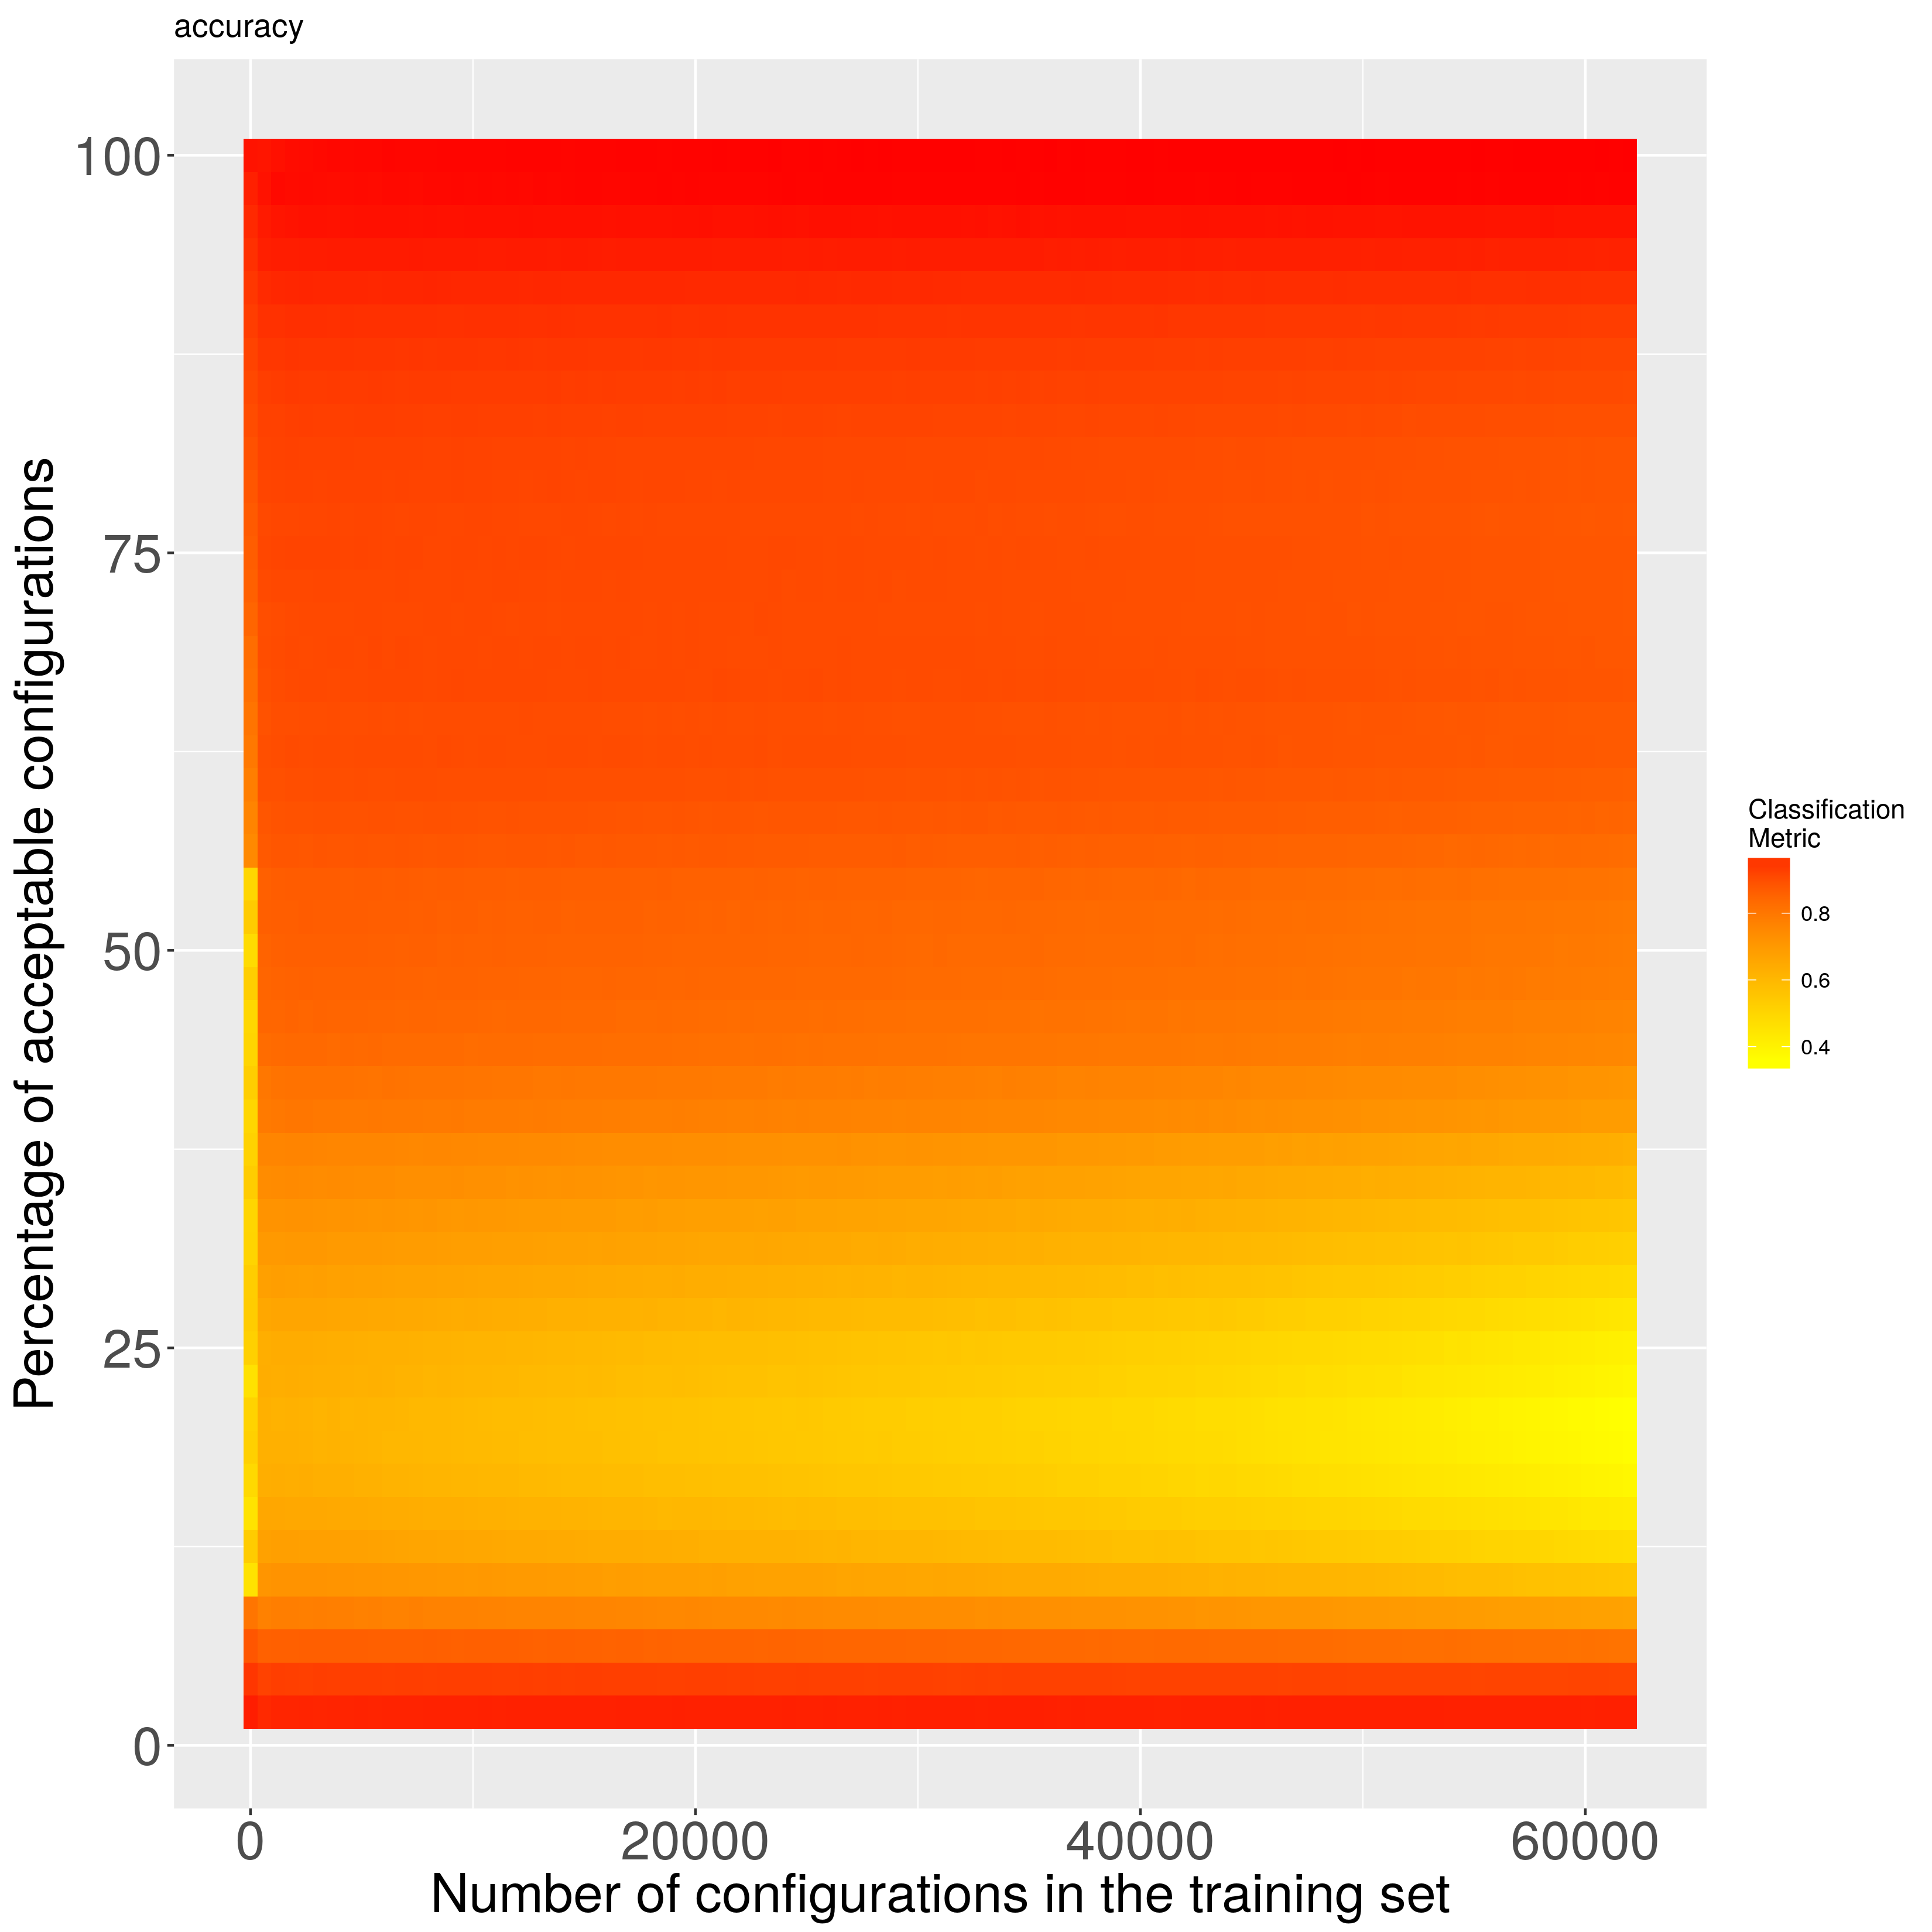

In [23]:
from IPython.display import display, Image
i = Image(filename=heatmapPath+"x264-accuracy.png")
i

In [10]:
min_size = 5
max_size = int(505)
steps = 50

training_size = [i for i in range(min_size, max_size, int((max_size-min_size)/steps))]
training_size

[5,
 15,
 25,
 35,
 45,
 55,
 65,
 75,
 85,
 95,
 105,
 115,
 125,
 135,
 145,
 155,
 165,
 175,
 185,
 195,
 205,
 215,
 225,
 235,
 245,
 255,
 265,
 275,
 285,
 295,
 305,
 315,
 325,
 335,
 345,
 355,
 365,
 375,
 385,
 395,
 405,
 415,
 425,
 435,
 445,
 455,
 465,
 475,
 485,
 495]

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

results = {"ts":[],"t":[],"TN":[],"TP":[],"FN":[],"FP":[]}

for ts in training_size:
    for t in sorted(set(thresholds_generated)):
        print("Threshold : "+str(t)+" / Training size : "+str(ts))
        df["label"] = 0
        df.loc[df[perf] > t, "label"] = 1
        
        dfSpec = df.drop(perf_x264, axis=1)
        shuffle_split = StratifiedShuffleSplit(train_size=ts, n_splits=10, random_state=42)
        
        TN = TP = FN = FP = 0
        
        classifier = tree.DecisionTreeClassifier(random_state=42)
        
        try:

            for train_index, test_index in shuffle_split.split(dfSpec,dfSpec.label):
                classifier.fit(dfSpec.drop(["label"],axis=1).iloc[train_index], dfSpec.label.iloc[train_index])

                prediction = classifier.predict(dfSpec.drop(["label"],axis=1).iloc[test_index])

                dfCompare = pd.DataFrame()
                dfCompare["oracle"] = dfSpec.label.iloc[test_index]
                dfCompare["prediction"]=prediction

                TN += dfCompare[(dfCompare.oracle == 0) & (dfCompare.prediction == 0)].shape[0]
                TP += dfCompare[(dfCompare.oracle == 1) & (dfCompare.prediction == 1)].shape[0]
                FN += dfCompare[(dfCompare.oracle == 1) & (dfCompare.prediction == 0)].shape[0]
                FP += dfCompare[(dfCompare.oracle == 0) & (dfCompare.prediction == 1)].shape[0]

            results["ts"].append(ts)
            results["t"].append(t)
            results["TN"].append(TN)
            results["TP"].append(TP)
            results["FN"].append(FN)
            results["FP"].append(FP)
        except Exception as e:
            print(e)
        
dfResults = pd.DataFrame(results)
dfResults

Threshold : 2.333333333333333 / Training size : 5
Threshold : 2.6666666666666665 / Training size : 5


/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Threshold : 3.0 / Training size : 5
Threshold : 3.333333333333333 / Training size : 5
Threshold : 3.6666666666666665 / Training size : 5
Threshold : 4.0 / Training size : 5
Threshold : 4.333333333333333 / Training size : 5
Threshold : 4.666666666666667 / Training size : 5
Threshold : 5.0 / Training size : 5
Threshold : 5.333333333333333 / Training size : 5
Threshold : 6.333333333333332 / Training size : 5
Threshold : 6.666666666666668 / Training size : 5
Threshold : 7.0 / Training size : 5
Threshold : 7.333333333333332 / Training size : 5
Threshold : 7.666666666666668 / Training size : 5
Threshold : 8.0 / Training size : 5
Threshold : 8.333333333333334 / Training size : 5
Threshold : 8.666666666666666 / Training size : 5
Threshold : 9.0 / Training size : 5
Threshold : 9.333333333333334 / Training size : 5
Threshold : 9.666666666666666 / Training size : 5
Threshold : 10.0 / Training size : 5
Threshold : 10.333333333333334 / Training size : 5
Threshold : 10.666666666666666 / Training siz

Threshold : 14.333333333333336 / Training size : 35
Threshold : 14.666666666666664 / Training size : 35
Threshold : 15.0 / Training size : 35
Threshold : 15.666666666666664 / Training size : 35
Threshold : 17.333333333333332 / Training size : 35
Threshold : 20.0 / Training size : 35
Threshold : 22.66666666666667 / Training size : 35
Threshold : 23.66666666666667 / Training size : 35
Threshold : 25.66666666666667 / Training size : 35
Threshold : 27.66666666666667 / Training size : 35
Threshold : 31.33333333333333 / Training size : 35
Threshold : 34.333333333333336 / Training size : 35
Threshold : 38.66666666666666 / Training size : 35
Threshold : 46.0 / Training size : 35
Threshold : 53.0 / Training size : 35
Threshold : 2.333333333333333 / Training size : 45
Threshold : 2.6666666666666665 / Training size : 45
Threshold : 3.0 / Training size : 45
Threshold : 3.333333333333333 / Training size : 45
Threshold : 3.6666666666666665 / Training size : 45
Threshold : 4.0 / Training size : 45
Th

Threshold : 7.666666666666668 / Training size : 75
Threshold : 8.0 / Training size : 75
Threshold : 8.333333333333334 / Training size : 75
Threshold : 8.666666666666666 / Training size : 75
Threshold : 9.0 / Training size : 75
Threshold : 9.333333333333334 / Training size : 75
Threshold : 9.666666666666666 / Training size : 75
Threshold : 10.0 / Training size : 75
Threshold : 10.333333333333334 / Training size : 75
Threshold : 10.666666666666666 / Training size : 75
Threshold : 11.0 / Training size : 75
Threshold : 11.333333333333336 / Training size : 75
Threshold : 11.666666666666664 / Training size : 75
Threshold : 12.0 / Training size : 75
Threshold : 12.333333333333336 / Training size : 75
Threshold : 12.666666666666664 / Training size : 75
Threshold : 13.0 / Training size : 75
Threshold : 13.333333333333336 / Training size : 75
Threshold : 13.666666666666664 / Training size : 75
Threshold : 14.333333333333336 / Training size : 75
Threshold : 14.666666666666664 / Training size : 75

Threshold : 27.66666666666667 / Training size : 105
Threshold : 31.33333333333333 / Training size : 105
Threshold : 34.333333333333336 / Training size : 105
Threshold : 38.66666666666666 / Training size : 105
Threshold : 46.0 / Training size : 105
Threshold : 53.0 / Training size : 105
Threshold : 2.333333333333333 / Training size : 115
Threshold : 2.6666666666666665 / Training size : 115
Threshold : 3.0 / Training size : 115
Threshold : 3.333333333333333 / Training size : 115
Threshold : 3.6666666666666665 / Training size : 115
Threshold : 4.0 / Training size : 115
Threshold : 4.333333333333333 / Training size : 115
Threshold : 4.666666666666667 / Training size : 115
Threshold : 5.0 / Training size : 115
Threshold : 5.333333333333333 / Training size : 115
Threshold : 6.333333333333332 / Training size : 115
Threshold : 6.666666666666668 / Training size : 115
Threshold : 7.0 / Training size : 115
Threshold : 7.333333333333332 / Training size : 115
Threshold : 7.666666666666668 / Trainin

Threshold : 9.666666666666666 / Training size : 145
Threshold : 10.0 / Training size : 145
Threshold : 10.333333333333334 / Training size : 145
Threshold : 10.666666666666666 / Training size : 145
Threshold : 11.0 / Training size : 145
Threshold : 11.333333333333336 / Training size : 145
Threshold : 11.666666666666664 / Training size : 145
Threshold : 12.0 / Training size : 145
Threshold : 12.333333333333336 / Training size : 145
Threshold : 12.666666666666664 / Training size : 145
Threshold : 13.0 / Training size : 145
Threshold : 13.333333333333336 / Training size : 145
Threshold : 13.666666666666664 / Training size : 145
Threshold : 14.333333333333336 / Training size : 145
Threshold : 14.666666666666664 / Training size : 145
Threshold : 15.0 / Training size : 145
Threshold : 15.666666666666664 / Training size : 145
Threshold : 17.333333333333332 / Training size : 145
Threshold : 20.0 / Training size : 145
Threshold : 22.66666666666667 / Training size : 145
Threshold : 23.66666666666

Threshold : 38.66666666666666 / Training size : 175
Threshold : 46.0 / Training size : 175
Threshold : 53.0 / Training size : 175
Threshold : 2.333333333333333 / Training size : 185
Threshold : 2.6666666666666665 / Training size : 185
Threshold : 3.0 / Training size : 185
Threshold : 3.333333333333333 / Training size : 185
Threshold : 3.6666666666666665 / Training size : 185
Threshold : 4.0 / Training size : 185
Threshold : 4.333333333333333 / Training size : 185
Threshold : 4.666666666666667 / Training size : 185
Threshold : 5.0 / Training size : 185
Threshold : 5.333333333333333 / Training size : 185
Threshold : 6.333333333333332 / Training size : 185
Threshold : 6.666666666666668 / Training size : 185
Threshold : 7.0 / Training size : 185
Threshold : 7.333333333333332 / Training size : 185
Threshold : 7.666666666666668 / Training size : 185
Threshold : 8.0 / Training size : 185
Threshold : 8.333333333333334 / Training size : 185
Threshold : 8.666666666666666 / Training size : 185
Th

Threshold : 11.0 / Training size : 215
Threshold : 11.333333333333336 / Training size : 215
Threshold : 11.666666666666664 / Training size : 215
Threshold : 12.0 / Training size : 215
Threshold : 12.333333333333336 / Training size : 215
Threshold : 12.666666666666664 / Training size : 215
Threshold : 13.0 / Training size : 215
Threshold : 13.333333333333336 / Training size : 215
Threshold : 13.666666666666664 / Training size : 215
Threshold : 14.333333333333336 / Training size : 215
Threshold : 14.666666666666664 / Training size : 215
Threshold : 15.0 / Training size : 215
Threshold : 15.666666666666664 / Training size : 215
Threshold : 17.333333333333332 / Training size : 215
Threshold : 20.0 / Training size : 215
Threshold : 22.66666666666667 / Training size : 215
Threshold : 23.66666666666667 / Training size : 215
Threshold : 25.66666666666667 / Training size : 215
Threshold : 27.66666666666667 / Training size : 215
Threshold : 31.33333333333333 / Training size : 215
Threshold : 34.

Threshold : 3.333333333333333 / Training size : 255
Threshold : 3.6666666666666665 / Training size : 255
Threshold : 4.0 / Training size : 255
Threshold : 4.333333333333333 / Training size : 255
Threshold : 4.666666666666667 / Training size : 255
Threshold : 5.0 / Training size : 255
Threshold : 5.333333333333333 / Training size : 255
Threshold : 6.333333333333332 / Training size : 255
Threshold : 6.666666666666668 / Training size : 255
Threshold : 7.0 / Training size : 255
Threshold : 7.333333333333332 / Training size : 255
Threshold : 7.666666666666668 / Training size : 255
Threshold : 8.0 / Training size : 255
Threshold : 8.333333333333334 / Training size : 255
Threshold : 8.666666666666666 / Training size : 255
Threshold : 9.0 / Training size : 255
Threshold : 9.333333333333334 / Training size : 255
Threshold : 9.666666666666666 / Training size : 255
Threshold : 10.0 / Training size : 255
Threshold : 10.333333333333334 / Training size : 255
Threshold : 10.666666666666666 / Training

Threshold : 12.666666666666664 / Training size : 285
Threshold : 13.0 / Training size : 285
Threshold : 13.333333333333336 / Training size : 285
Threshold : 13.666666666666664 / Training size : 285
Threshold : 14.333333333333336 / Training size : 285
Threshold : 14.666666666666664 / Training size : 285
Threshold : 15.0 / Training size : 285
Threshold : 15.666666666666664 / Training size : 285
Threshold : 17.333333333333332 / Training size : 285
Threshold : 20.0 / Training size : 285
Threshold : 22.66666666666667 / Training size : 285
Threshold : 23.66666666666667 / Training size : 285
Threshold : 25.66666666666667 / Training size : 285
Threshold : 27.66666666666667 / Training size : 285
Threshold : 31.33333333333333 / Training size : 285
Threshold : 34.333333333333336 / Training size : 285
Threshold : 38.66666666666666 / Training size : 285
Threshold : 46.0 / Training size : 285
Threshold : 53.0 / Training size : 285
Threshold : 2.333333333333333 / Training size : 295
Threshold : 2.666

Threshold : 4.666666666666667 / Training size : 325
Threshold : 5.0 / Training size : 325
Threshold : 5.333333333333333 / Training size : 325
Threshold : 6.333333333333332 / Training size : 325
Threshold : 6.666666666666668 / Training size : 325
Threshold : 7.0 / Training size : 325
Threshold : 7.333333333333332 / Training size : 325
Threshold : 7.666666666666668 / Training size : 325
Threshold : 8.0 / Training size : 325
Threshold : 8.333333333333334 / Training size : 325
Threshold : 8.666666666666666 / Training size : 325
Threshold : 9.0 / Training size : 325
Threshold : 9.333333333333334 / Training size : 325
Threshold : 9.666666666666666 / Training size : 325
Threshold : 10.0 / Training size : 325
Threshold : 10.333333333333334 / Training size : 325
Threshold : 10.666666666666666 / Training size : 325
Threshold : 11.0 / Training size : 325
Threshold : 11.333333333333336 / Training size : 325
Threshold : 11.666666666666664 / Training size : 325
Threshold : 12.0 / Training size : 325

Threshold : 14.333333333333336 / Training size : 355
Threshold : 14.666666666666664 / Training size : 355
Threshold : 15.0 / Training size : 355
Threshold : 15.666666666666664 / Training size : 355
Threshold : 17.333333333333332 / Training size : 355
Threshold : 20.0 / Training size : 355
Threshold : 22.66666666666667 / Training size : 355
Threshold : 23.66666666666667 / Training size : 355
Threshold : 25.66666666666667 / Training size : 355
Threshold : 27.66666666666667 / Training size : 355
Threshold : 31.33333333333333 / Training size : 355
Threshold : 34.333333333333336 / Training size : 355
Threshold : 38.66666666666666 / Training size : 355
Threshold : 46.0 / Training size : 355
Threshold : 53.0 / Training size : 355
Threshold : 2.333333333333333 / Training size : 365
Threshold : 2.6666666666666665 / Training size : 365
Threshold : 3.0 / Training size : 365
Threshold : 3.333333333333333 / Training size : 365
Threshold : 3.6666666666666665 / Training size : 365
Threshold : 4.0 / T

Threshold : 6.666666666666668 / Training size : 395
Threshold : 7.0 / Training size : 395
Threshold : 7.333333333333332 / Training size : 395
Threshold : 7.666666666666668 / Training size : 395
Threshold : 8.0 / Training size : 395
Threshold : 8.333333333333334 / Training size : 395
Threshold : 8.666666666666666 / Training size : 395
Threshold : 9.0 / Training size : 395
Threshold : 9.333333333333334 / Training size : 395
Threshold : 9.666666666666666 / Training size : 395
Threshold : 10.0 / Training size : 395
Threshold : 10.333333333333334 / Training size : 395
Threshold : 10.666666666666666 / Training size : 395
Threshold : 11.0 / Training size : 395
Threshold : 11.333333333333336 / Training size : 395
Threshold : 11.666666666666664 / Training size : 395
Threshold : 12.0 / Training size : 395
Threshold : 12.333333333333336 / Training size : 395
Threshold : 12.666666666666664 / Training size : 395
Threshold : 13.0 / Training size : 395
Threshold : 13.333333333333336 / Training size :

Threshold : 17.333333333333332 / Training size : 425
Threshold : 20.0 / Training size : 425
Threshold : 22.66666666666667 / Training size : 425
Threshold : 23.66666666666667 / Training size : 425
Threshold : 25.66666666666667 / Training size : 425
Threshold : 27.66666666666667 / Training size : 425
Threshold : 31.33333333333333 / Training size : 425
Threshold : 34.333333333333336 / Training size : 425
Threshold : 38.66666666666666 / Training size : 425
Threshold : 46.0 / Training size : 425
Threshold : 53.0 / Training size : 425
Threshold : 2.333333333333333 / Training size : 435
Threshold : 2.6666666666666665 / Training size : 435
Threshold : 3.0 / Training size : 435
Threshold : 3.333333333333333 / Training size : 435
Threshold : 3.6666666666666665 / Training size : 435
Threshold : 4.0 / Training size : 435
Threshold : 4.333333333333333 / Training size : 435
Threshold : 4.666666666666667 / Training size : 435
Threshold : 5.0 / Training size : 435
Threshold : 5.333333333333333 / Train

Threshold : 8.0 / Training size : 465
Threshold : 8.333333333333334 / Training size : 465
Threshold : 8.666666666666666 / Training size : 465
Threshold : 9.0 / Training size : 465
Threshold : 9.333333333333334 / Training size : 465
Threshold : 9.666666666666666 / Training size : 465
Threshold : 10.0 / Training size : 465
Threshold : 10.333333333333334 / Training size : 465
Threshold : 10.666666666666666 / Training size : 465
Threshold : 11.0 / Training size : 465
Threshold : 11.333333333333336 / Training size : 465
Threshold : 11.666666666666664 / Training size : 465
Threshold : 12.0 / Training size : 465
Threshold : 12.333333333333336 / Training size : 465
Threshold : 12.666666666666664 / Training size : 465
Threshold : 13.0 / Training size : 465
Threshold : 13.333333333333336 / Training size : 465
Threshold : 13.666666666666664 / Training size : 465
Threshold : 14.333333333333336 / Training size : 465
Threshold : 14.666666666666664 / Training size : 465
Threshold : 15.0 / Training si

Threshold : 25.66666666666667 / Training size : 495
Threshold : 27.66666666666667 / Training size : 495
Threshold : 31.33333333333333 / Training size : 495
Threshold : 34.333333333333336 / Training size : 495
Threshold : 38.66666666666666 / Training size : 495
Threshold : 46.0 / Training size : 495
Threshold : 53.0 / Training size : 495


,FN,FP,TN,TP,t,ts
0,0,1200,0,67810,2.333333,5
1,0,3300,0,65710,2.666667,5
2,18426,4697,2843,43044,3.000000,5
3,16481,7892,5208,39429,3.333333,5
4,17318,11364,6276,34052,3.666667,5
5,18230,11798,8982,30000,4.000000,5
6,18738,12517,10183,27572,4.333333,5
7,17314,13844,10346,27506,4.666667,5
8,20878,13699,11371,23062,5.000000,5
9,14330,14987,10313,29380,5.333333,5


In [32]:
TP = 50
TN = 525
FN = 20
FP = 75

accuracy= (TP+TN) / (TP+TN+FN+FP)
precision= (TP) / (TP+FP)
recall= (TP) / (TP+FN)
specificity= (TN) / (TN+FP)
npv= (TN) / (TN+FN)
print(accuracy)
print(precision)
print(recall)
print(specificity)
print(npv)

0.8582089552238806
0.4
0.7142857142857143
0.875
0.963302752293578


In [33]:

dataPath = "./data/"
#If data fodler does not exists
if not os.path.exists(dataPath):
    try:
        os.makedirs(dataPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

dfResults.to_csv(dataPath+"x264-2.csv")

In [34]:

#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps.R {dataPath}{"x264-2"}.csv {heatmapPath}

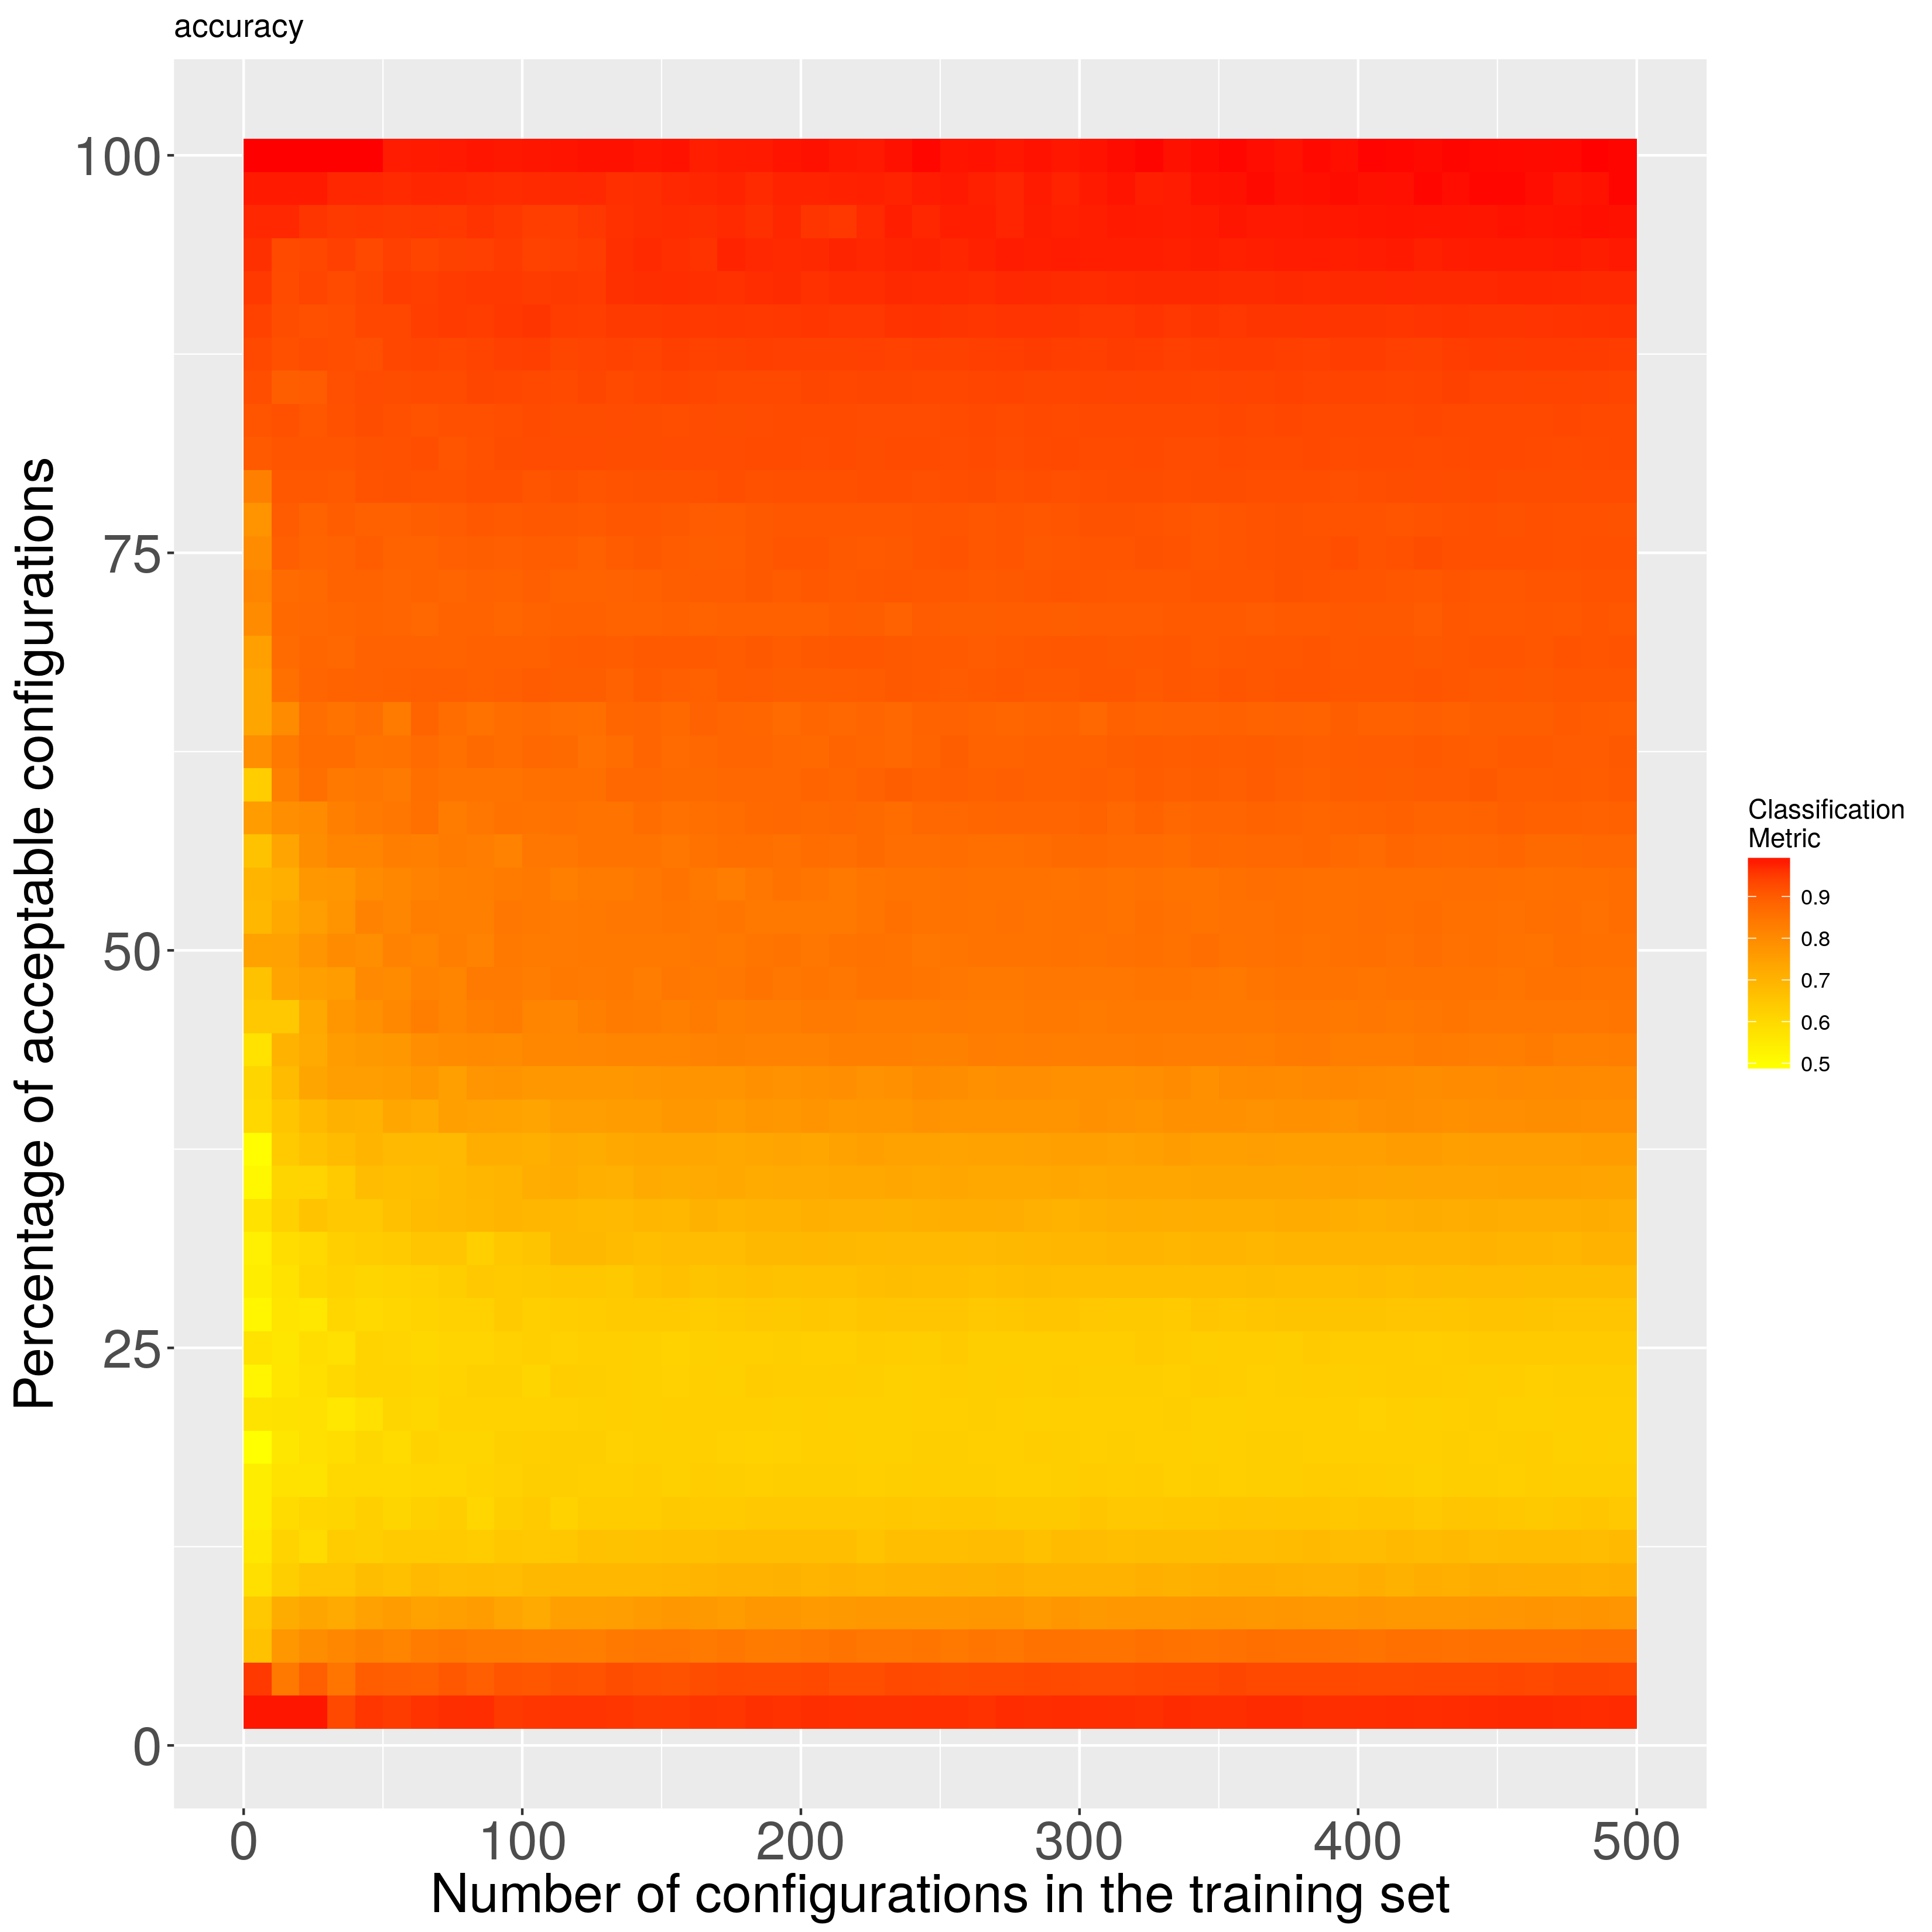

In [35]:
from IPython.display import display, Image
i = Image(filename=heatmapPath+"x264-2-accuracy.png")
i

In [44]:
print(classifier.tree_.node_count)

11


In [142]:
resultsList = pd.read_csv("./data4/results-list.csv")

In [143]:
resultsList

,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,presort,random_state,results,splitter
0,NaN,gini,HSMGP,NaN,NaN,10.0,1.000000e-07,1,2,0.0,False,NaN,./data4/HSMGP-0001-classification.csv,best
1,NaN,mse,HSMGP,NaN,NaN,10.0,1.000000e-07,1,2,0.0,False,NaN,./data4/HSMGP-0002-regression.csv,best
2,NaN,entropy,HSMGP,NaN,NaN,10.0,1.000000e-07,1,2,0.0,False,NaN,./data4/HSMGP-0003-classification.csv,best
3,NaN,mae,HSMGP,NaN,NaN,10.0,1.000000e-07,1,2,0.0,False,NaN,./data4/HSMGP-0004-regression.csv,best
4,NaN,gini,HSMGP,NaN,NaN,10.0,1.000000e-07,2,2,0.0,False,NaN,./data4/HSMGP-0005-classification.csv,best
5,NaN,mse,HSMGP,NaN,NaN,10.0,1.000000e-07,2,2,0.0,False,NaN,./data4/HSMGP-0006-regression.csv,best
6,NaN,entropy,HSMGP,NaN,NaN,10.0,1.000000e-07,2,2,0.0,False,NaN,./data4/HSMGP-0007-classification.csv,best
7,NaN,mae,HSMGP,NaN,NaN,10.0,1.000000e-07,2,2,0.0,False,NaN,./data4/HSMGP-0008-regression.csv,best
8,NaN,gini,HSMGP,NaN,NaN,10.0,1.000000e-07,4,2,0.0,False,NaN,./data4/HSMGP-0009-classification.csv,best
9,NaN,mse,HSMGP,NaN,NaN,10.0,1.000000e-07,4,2,0.0,False,NaN,./data4/HSMGP-0010-regression.csv,best


In [144]:
serie = []
for i in resultsList['results']:
    serie.append(i.split("-")[2].split(".")[0])
#print(serie)

serie = pd.Series(serie)

resultsList['type'] = serie

In [22]:
resultsList = resultsList[resultsList["file"]=="x264"]

In [51]:
resultsList.index

RangeIndex(start=0, stop=3712, step=1)

In [60]:
#resultsList = resultsList.drop(resultsList.index[:4])

In [67]:
resultsList

,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,presort,random_state,results,splitter,type
3516,NaN,mse,x264,NaN,NaN,20,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0005-regression.csv,best,regression
3517,NaN,gini,x264,NaN,NaN,20,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification
3518,NaN,mae,x264,NaN,NaN,20,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0007-regression.csv,best,regression
3519,NaN,entropy,x264,NaN,NaN,20,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0008-classification.csv,best,classification
3520,NaN,mse,x264,NaN,NaN,20,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0009-regression.csv,best,regression
3521,NaN,gini,x264,NaN,NaN,20,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0010-classification.csv,best,classification
3522,NaN,mae,x264,NaN,NaN,20,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0011-regression.csv,best,regression
3523,NaN,entropy,x264,NaN,NaN,20,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0012-classification.csv,best,classification
3524,NaN,mse,x264,NaN,NaN,20,1.000000e-07,4,2,0.0,False,NaN,./data4/x264_Time-0013-regression.csv,best,regression
3525,NaN,gini,x264,NaN,NaN,20,1.000000e-07,4,2,0.0,False,NaN,./data4/x264_Time-0014-classification.csv,best,classification


In [66]:
#resultsList = resultsList[:-4]

In [72]:
accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsList['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsList['accuracy'] = pd.Series(accuracy)
resultsList['precision'] = pd.Series(precision)
resultsList['recall'] = pd.Series(recall)
resultsList['specificity'] = pd.Series(specificity)
resultsList['npv'] = pd.Series(npv)
resultsList

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
0,3516,NaN,mse,x264,NaN,NaN,20,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0005-regression.csv,best,regression,0.790072,0.770749,0.813195,0.767840,0.811087
1,3517,NaN,gini,x264,NaN,NaN,20,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification,0.778168,0.775513,0.770126,0.785901,0.780823
2,3518,NaN,mae,x264,NaN,NaN,20,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0007-regression.csv,best,regression,0.782755,0.776318,0.781788,0.783684,0.789261
3,3519,NaN,entropy,x264,NaN,NaN,20,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0008-classification.csv,best,classification,0.776931,0.776287,0.765124,0.788284,0.777749
4,3520,NaN,mse,x264,NaN,NaN,20,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0009-regression.csv,best,regression,0.790064,0.768065,0.819138,0.762111,0.814299
5,3521,NaN,gini,x264,NaN,NaN,20,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0010-classification.csv,best,classification,0.774437,0.780289,0.750031,0.797903,0.769981
6,3522,NaN,mae,x264,NaN,NaN,20,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0011-regression.csv,best,regression,0.783183,0.776089,0.783705,0.782682,0.790283
7,3523,NaN,entropy,x264,NaN,NaN,20,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0012-classification.csv,best,classification,0.773982,0.780263,0.748924,0.798074,0.769007
8,3524,NaN,mse,x264,NaN,NaN,20,1.000000e-07,4,2,...,False,NaN,./data4/x264_Time-0013-regression.csv,best,regression,0.789671,0.764112,0.826401,0.754358,0.818663
9,3525,NaN,gini,x264,NaN,NaN,20,1.000000e-07,4,2,...,False,NaN,./data4/x264_Time-0014-classification.csv,best,classification,0.774486,0.778763,0.753475,0.794686,0.770842


In [71]:
resultsList = resultsList.reset_index()

In [73]:
metric = "accuracy"
idx = resultsList.groupby(["file","type"])[metric].transform(max) == resultsList[metric]
resultsList[(resultsList['type'] == "classification") | (resultsList['type'] == "regression")][idx].sort_values(["file"])

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
1,3517,NaN,gini,x264,NaN,NaN,20,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification,0.778168,0.775513,0.770126,0.785901,0.780823
52,3568,NaN,mse,x264,5.0,NaN,20,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0057-regression.csv,best,regression,0.790656,0.768714,0.819164,0.763246,0.814800


In [77]:
(dfResults["TP"].mean() + dfResults["TN"].mean()) / (dfResults["TP"].mean() + dfResults["TN"].mean() + dfResults["FP"].mean() + dfResults["FN"].mean())

0.8217654868859586

In [79]:
(dfResults["TP"].mean() + dfResults["TN"].mean()) / (dfResults["TP"].mean() + dfResults["TN"].mean() + dfResults["FP"].mean() + dfResults["FN"].mean())

0.8261305245616578

In [80]:
dfRes2 = pd.read_csv("./data4/x264_Time-0006-classification.csv")

In [81]:
(dfRes2["TP"].mean() + dfRes2["TN"].mean()) / (dfRes2["TP"].mean() + dfRes2["TN"].mean() + dfRes2["FP"].mean() + dfRes2["FN"].mean())

0.7781683652932747

In [83]:
dfRes3 = pd.read_csv("./data/x264-2.csv")

In [84]:
(dfRes3["TP"].mean() + dfRes3["TN"].mean()) / (dfRes3["TP"].mean() + dfRes3["TN"].mean() + dfRes3["FP"].mean() + dfRes3["FN"].mean())

0.8217654868859586

In [12]:
(dfResults["TP"].mean() + dfResults["TN"].mean()) / (dfResults["TP"].mean() + dfResults["TN"].mean() + dfResults["FP"].mean() + dfResults["FN"].mean())

0.8261305245616578

In [14]:
(dfResults["TP"].mean() + dfResults["TN"].mean()) / (dfResults["TP"].mean() + dfResults["TN"].mean() + dfResults["FP"].mean() + dfResults["FN"].mean())

0.8217654868859586

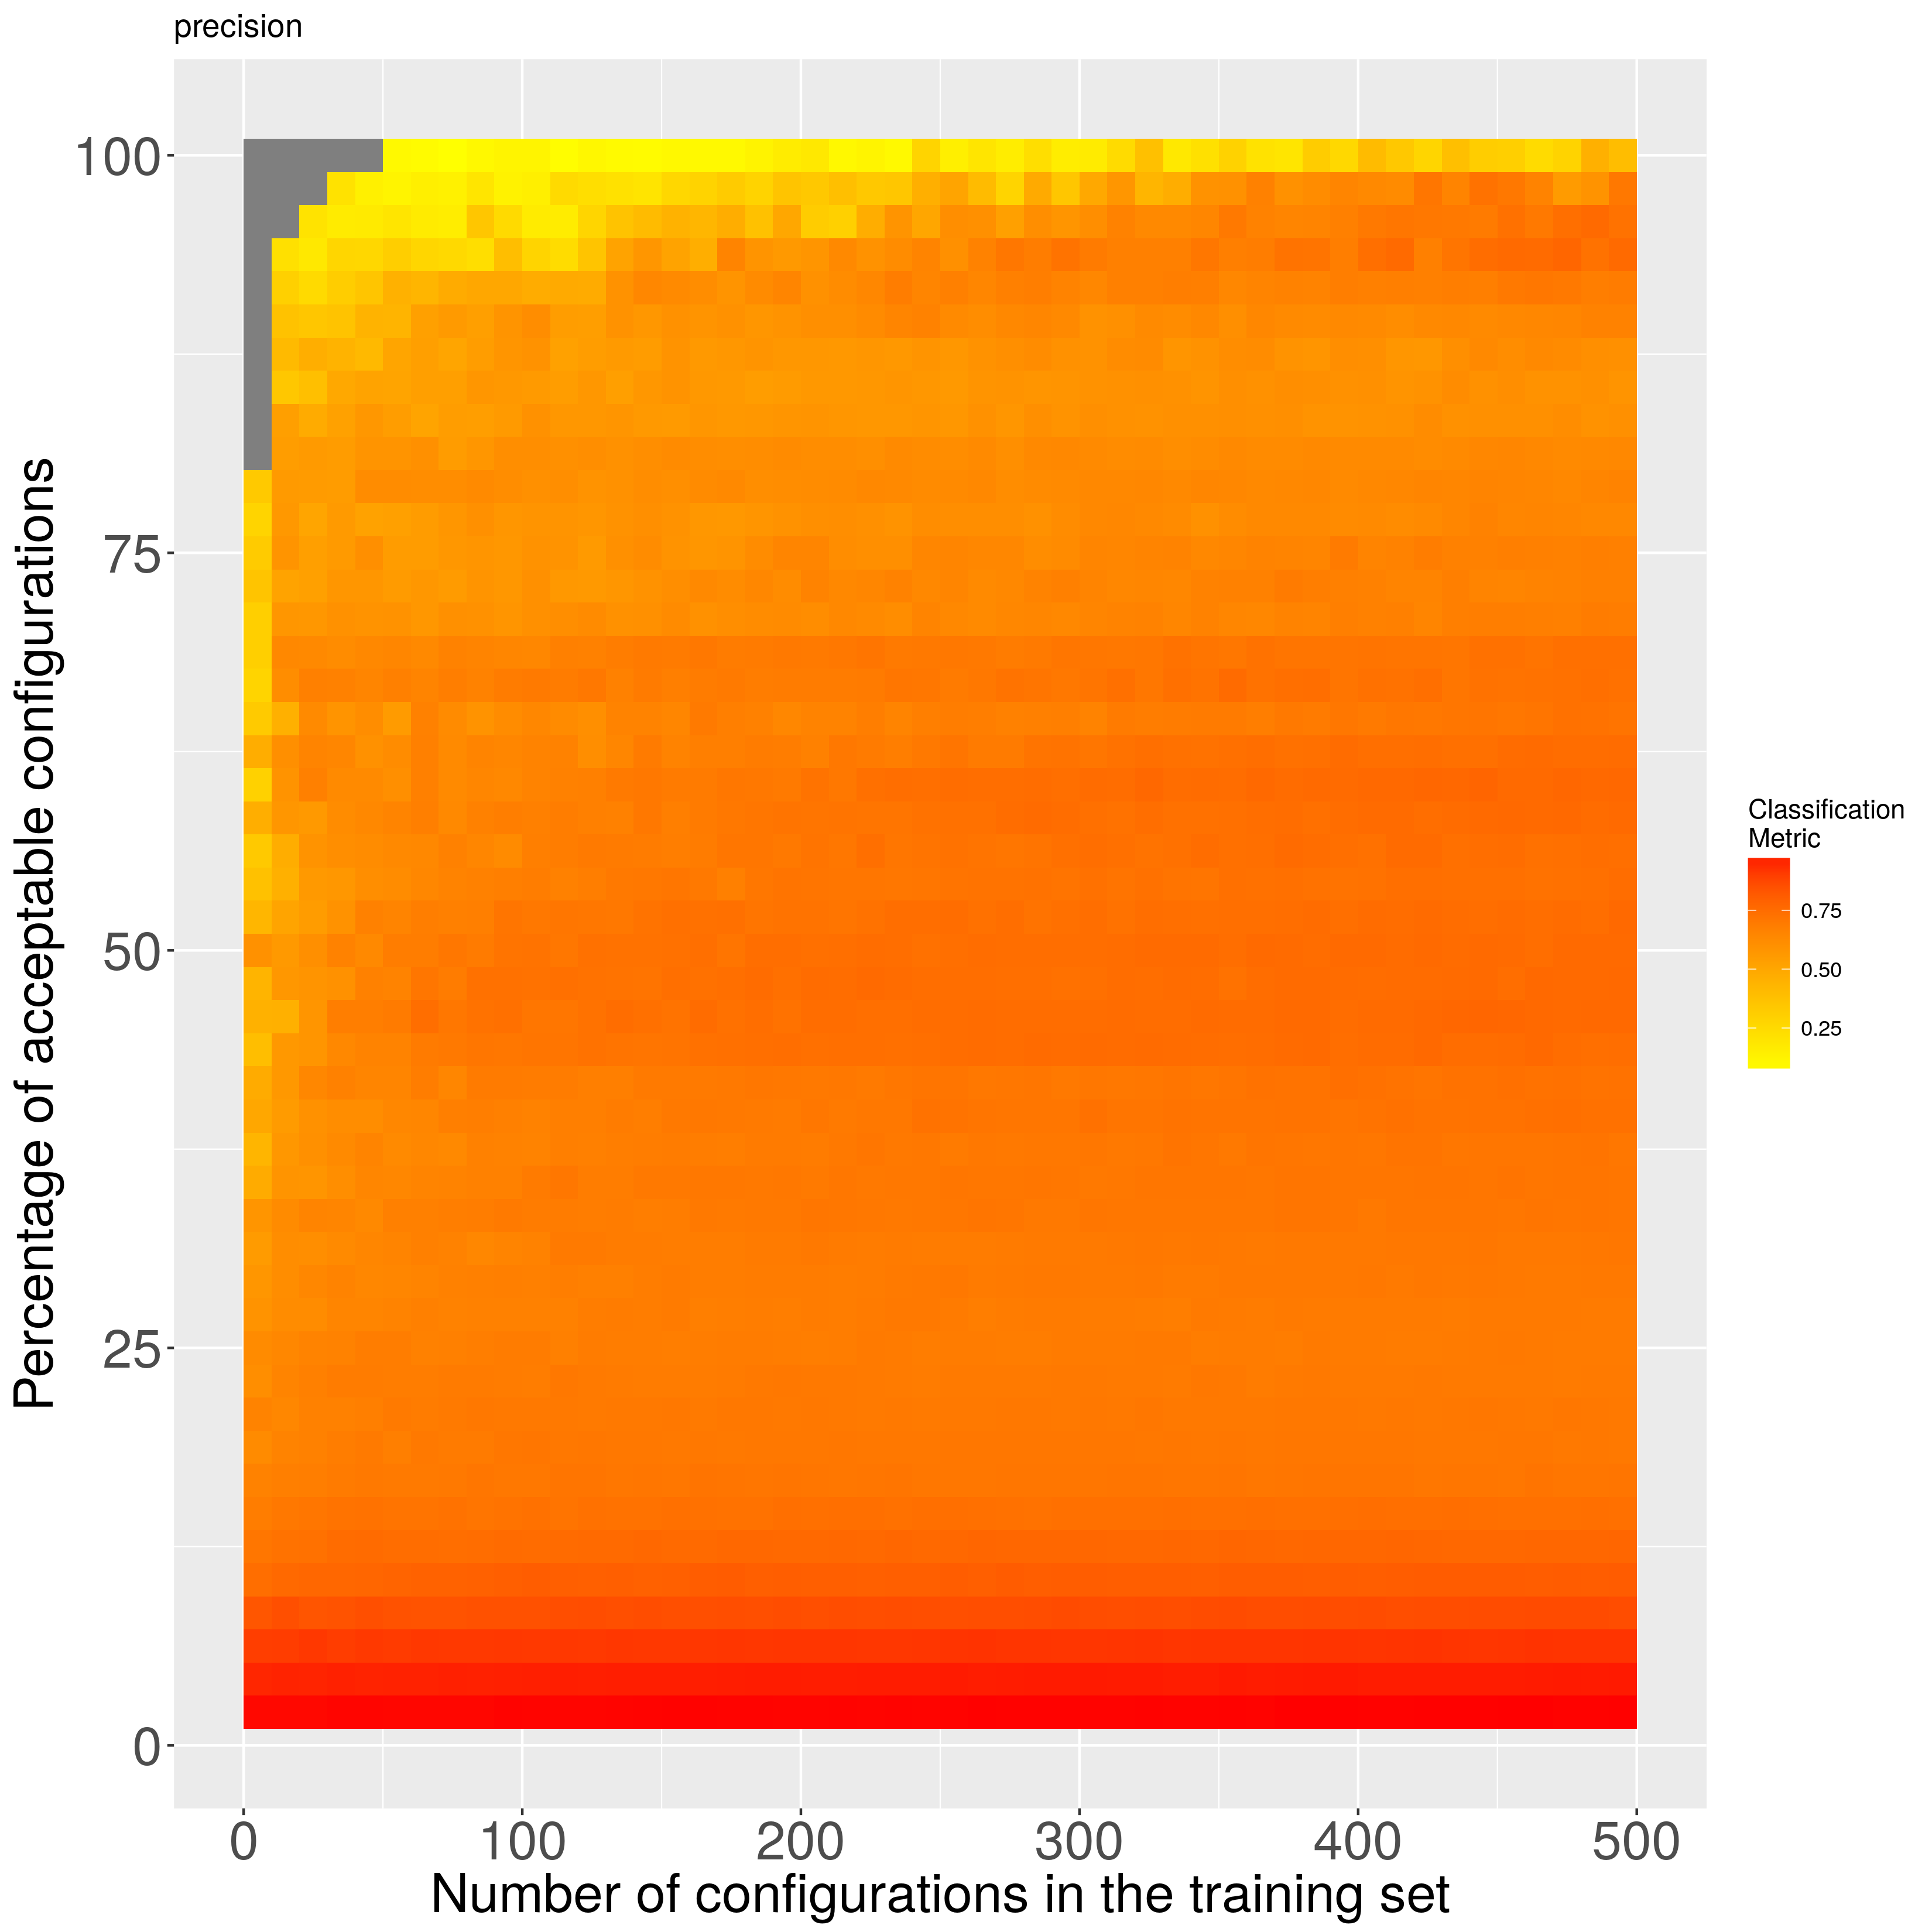

In [17]:

heatmapPath = "./heatmaps/"
from IPython.display import display, Image
i = Image(filename=heatmapPath+"x264-2-precision.png")
i

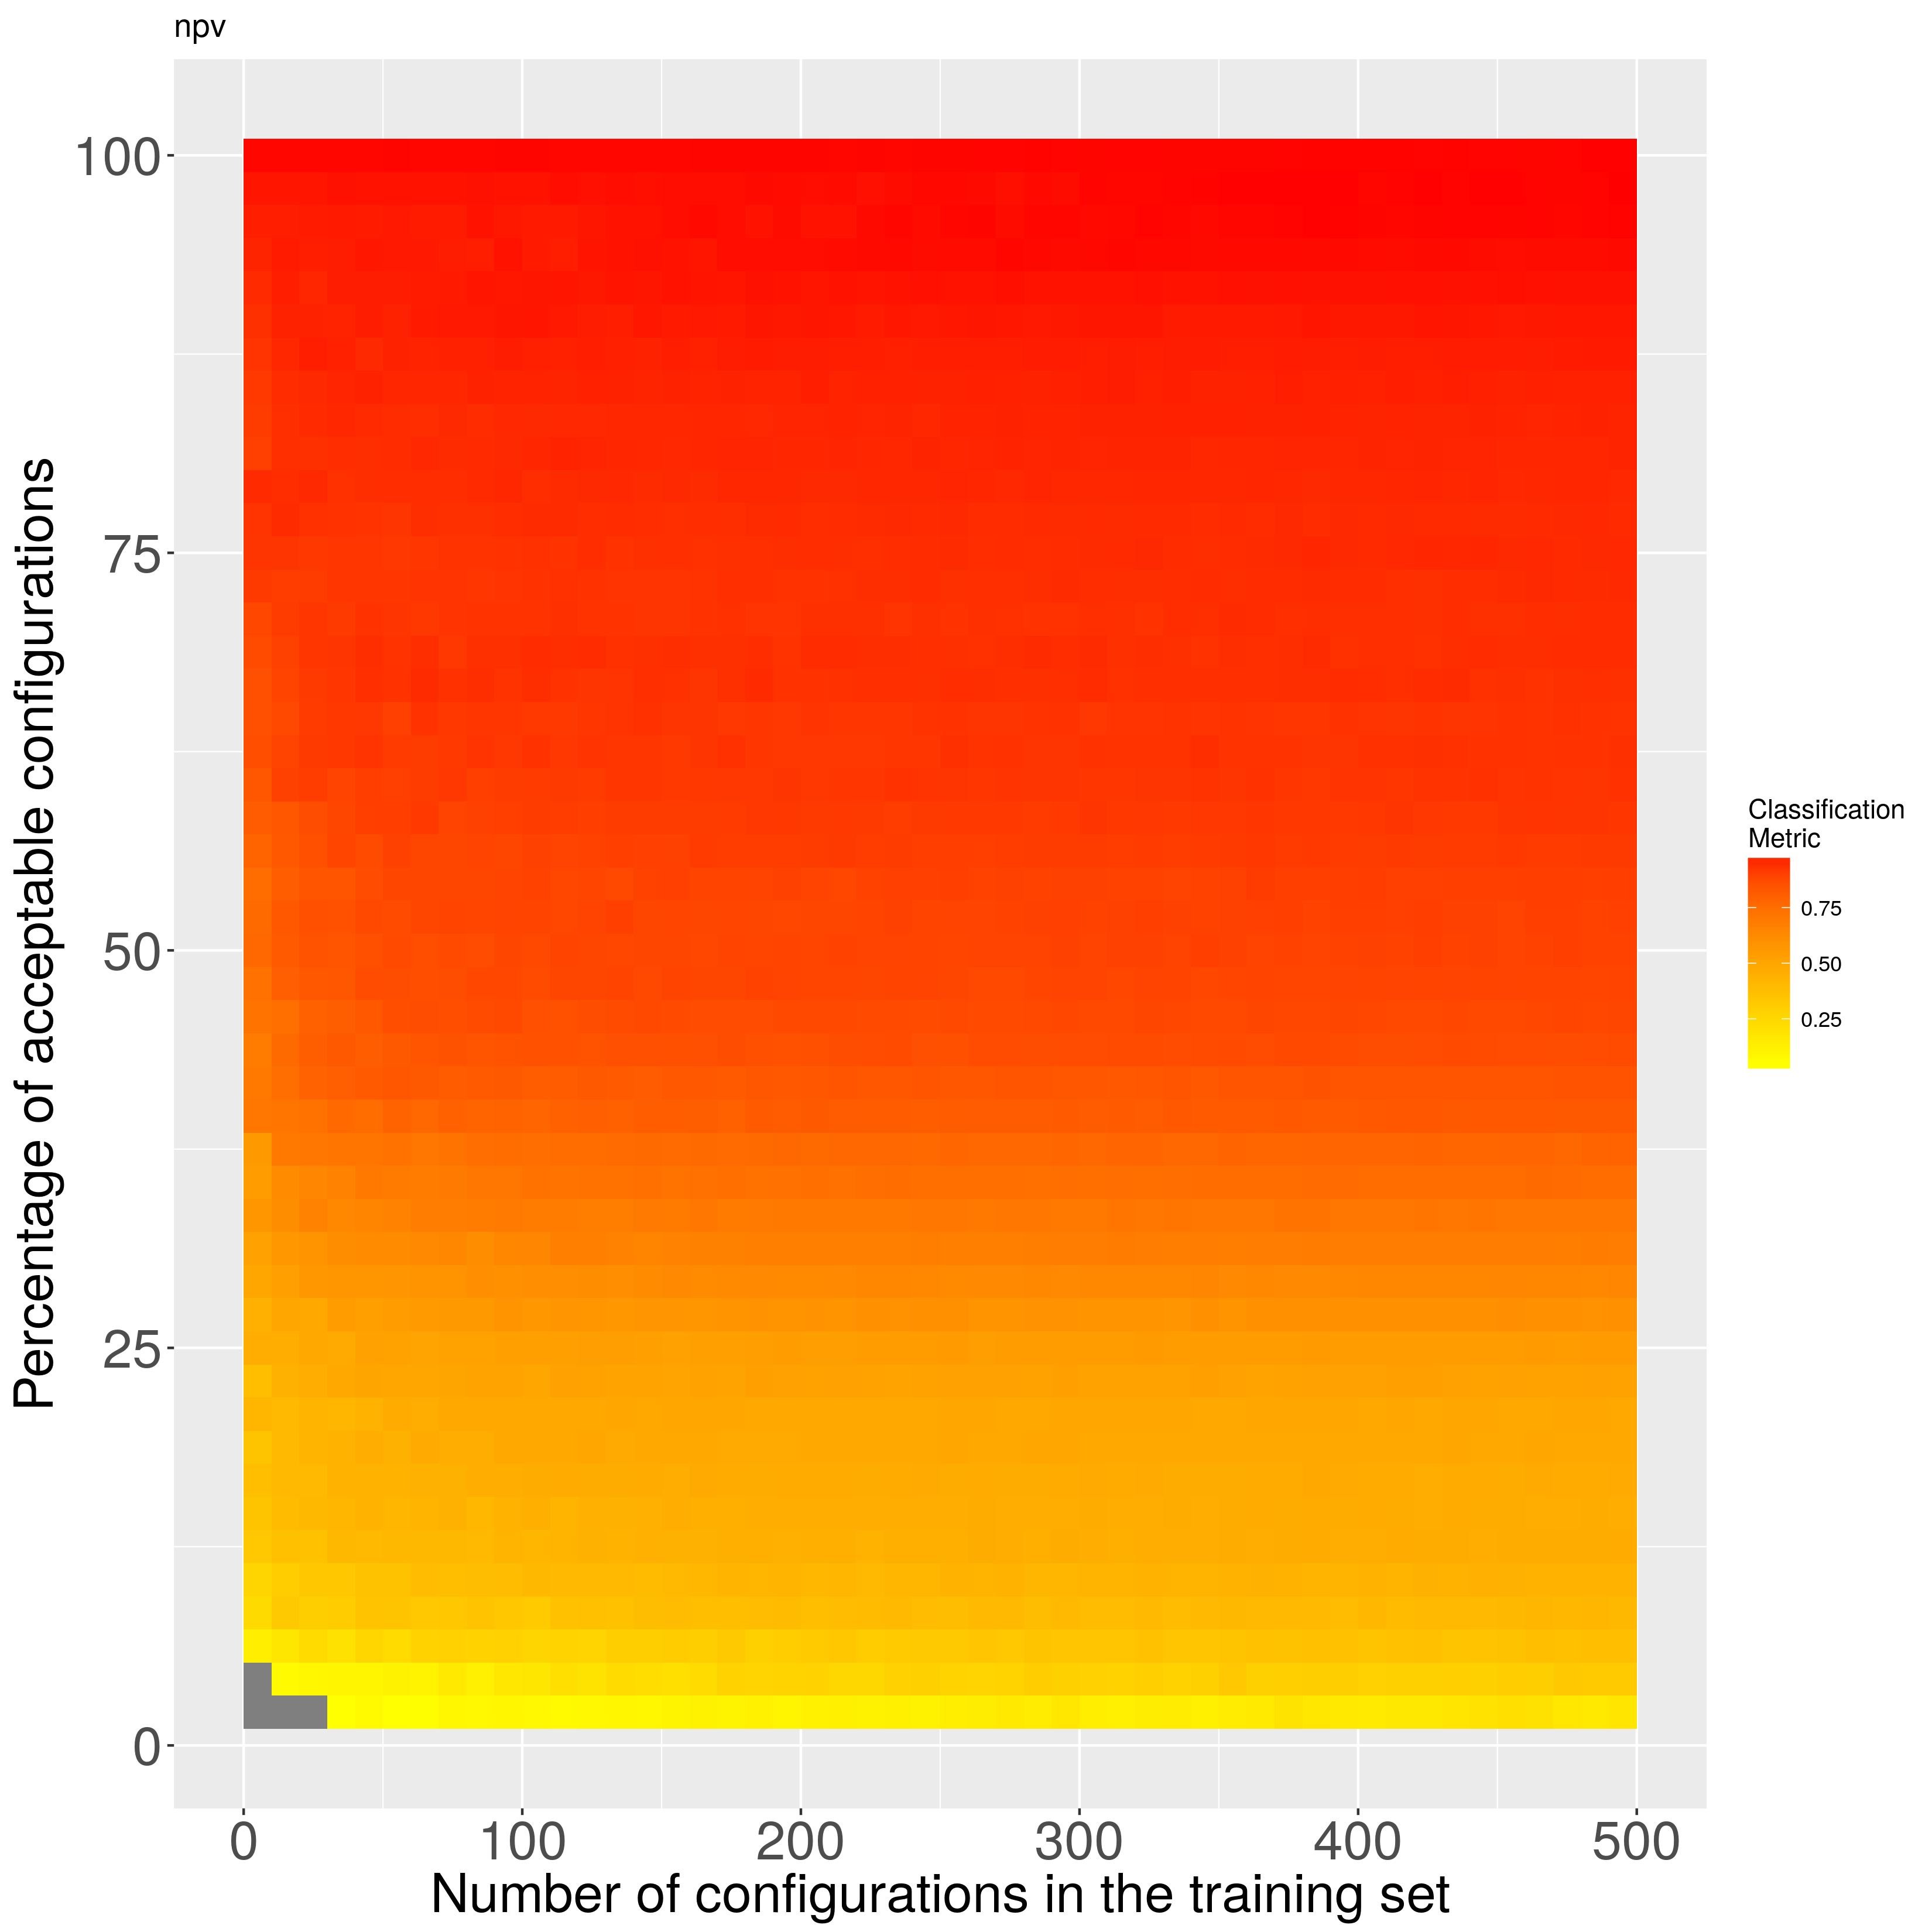

In [18]:

i = Image(filename=heatmapPath+"x264-2-npv.png")
i

In [32]:
resultsList["results"].iloc[0].split("-")[0].split("_")[1]

'Time'

In [36]:
resultsListTime = resultsList[resultsList["results"].str.contains("Time")]

In [37]:
resultsListTime

,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,presort,random_state,results,splitter,type
3512,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0001-classification.csv,best,classification
3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification
3514,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0003-classification.csv,best,classification
3515,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0004-classification.csv,best,classification
3516,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0005-regression.csv,best,regression
3517,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification
3518,NaN,mae,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0007-regression.csv,best,regression
3519,NaN,entropy,x264,NaN,NaN,20.0,1.000000e-07,1,2,0.0,False,NaN,./data4/x264_Time-0008-classification.csv,best,classification
3520,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0009-regression.csv,best,regression
3521,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,2,2,0.0,False,NaN,./data4/x264_Time-0010-classification.csv,best,classification


In [39]:
resultsListTime = resultsListTime.reset_index()

accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsListTime['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsListTime['accuracy'] = pd.Series(accuracy)
resultsListTime['precision'] = pd.Series(precision)
resultsListTime['recall'] = pd.Series(recall)
resultsListTime['specificity'] = pd.Series(specificity)
resultsListTime['npv'] = pd.Series(npv)
resultsListTime

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
0,3512,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0001-classification.csv,best,classification,0.778079,0.776108,0.768730,0.787067,0.780082
1,3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification,0.778298,0.775877,0.769825,0.786444,0.780698
2,3514,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0003-classification.csv,best,classification,0.778189,0.775965,0.769462,0.786580,0.780374
3,3515,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0004-classification.csv,best,classification,0.777968,0.776407,0.767744,0.787798,0.779652
4,3516,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0005-regression.csv,best,regression,0.790072,0.770749,0.813195,0.767840,0.811087
5,3517,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification,0.778168,0.775513,0.770126,0.785901,0.780823
6,3518,NaN,mae,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0007-regression.csv,best,regression,0.782755,0.776318,0.781788,0.783684,0.789261
7,3519,NaN,entropy,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0008-classification.csv,best,classification,0.776931,0.776287,0.765124,0.788284,0.777749
8,3520,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0009-regression.csv,best,regression,0.790064,0.768065,0.819138,0.762111,0.814299
9,3521,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0010-classification.csv,best,classification,0.774437,0.780289,0.750031,0.797903,0.769981


In [40]:
metric = "accuracy"
idx = resultsListTime.groupby(["file","type"])[metric].transform(max) == resultsListTime[metric]
resultsListTime[(resultsListTime['type'] == "classification") | (resultsListTime['type'] == "regression")][idx].sort_values(["file"])

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
1,3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification,0.778298,0.775877,0.769825,0.786444,0.780698
56,3568,NaN,mse,x264,5.0,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0057-regression.csv,best,regression,0.790656,0.768714,0.819164,0.763246,0.814800


In [42]:
resultsListTime[(resultsListTime['type'] == "classification")].sort_values("accuracy")

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
41,3553,NaN,gini,x264,NaN,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0042-classification.csv,best,classification,0.768240,0.785183,0.724730,0.810073,0.754534
137,3649,NaN,gini,x264,10.0,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0138-classification.csv,best,classification,0.768260,0.785414,0.724363,0.810464,0.754403
185,3697,NaN,gini,x264,20.0,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0186-classification.csv,best,classification,0.768303,0.784526,0.726106,0.808873,0.755095
169,3681,NaN,gini,x264,20.0,NaN,40.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0170-classification.csv,best,classification,0.769619,0.782397,0.733043,0.804785,0.759210
25,3537,NaN,gini,x264,NaN,NaN,40.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0026-classification.csv,best,classification,0.769759,0.782046,0.733951,0.804187,0.759737
187,3699,NaN,entropy,x264,20.0,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0188-classification.csv,best,classification,0.769789,0.786203,0.727324,0.810618,0.756387
197,3924,NaN,gini,x264,NaN,NaN,NaN,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0198-classification.csv,best,classification,0.769922,0.768035,0.759686,0.779763,0.771769
43,3555,NaN,entropy,x264,NaN,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0044-classification.csv,best,classification,0.770054,0.786335,0.728018,0.810470,0.756738
139,3651,NaN,entropy,x264,10.0,NaN,60.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0140-classification.csv,best,classification,0.770120,0.786271,0.728269,0.810358,0.756895
121,3633,NaN,gini,x264,10.0,NaN,40.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0122-classification.csv,best,classification,0.770122,0.782676,0.734003,0.804848,0.759850


In [43]:
resultsListTime

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
0,3512,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0001-classification.csv,best,classification,0.778079,0.776108,0.768730,0.787067,0.780082
1,3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification,0.778298,0.775877,0.769825,0.786444,0.780698
2,3514,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0003-classification.csv,best,classification,0.778189,0.775965,0.769462,0.786580,0.780374
3,3515,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0004-classification.csv,best,classification,0.777968,0.776407,0.767744,0.787798,0.779652
4,3516,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0005-regression.csv,best,regression,0.790072,0.770749,0.813195,0.767840,0.811087
5,3517,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0006-classification.csv,best,classification,0.778168,0.775513,0.770126,0.785901,0.780823
6,3518,NaN,mae,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0007-regression.csv,best,regression,0.782755,0.776318,0.781788,0.783684,0.789261
7,3519,NaN,entropy,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0008-classification.csv,best,classification,0.776931,0.776287,0.765124,0.788284,0.777749
8,3520,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0009-regression.csv,best,regression,0.790064,0.768065,0.819138,0.762111,0.814299
9,3521,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0010-classification.csv,best,classification,0.774437,0.780289,0.750031,0.797903,0.769981


In [44]:
resultsListWatt = resultsList[resultsList["results"].str.contains("Watt")]

In [45]:
resultsListWatt = resultsListWatt.reset_index()

accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsListWatt['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsListWatt['accuracy'] = pd.Series(accuracy)
resultsListWatt['precision'] = pd.Series(precision)
resultsListWatt['recall'] = pd.Series(recall)
resultsListWatt['specificity'] = pd.Series(specificity)
resultsListWatt['npv'] = pd.Series(npv)
resultsListWatt

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
0,3925,NaN,mse,x264,NaN,NaN,NaN,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0001-regression.csv,best,regression,0.739579,0.740478,0.737294,0.741863,0.738792
1,3926,NaN,gini,x264,NaN,NaN,NaN,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0002-classification.csv,best,classification,0.730800,0.730279,0.731741,0.729858,0.731357
2,3927,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0003-regression.csv,best,regression,0.771756,0.778346,0.760293,0.783219,0.765599
3,3928,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0004-classification.csv,best,classification,0.754536,0.758068,0.747625,0.761447,0.751210
4,3929,NaN,mae,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0005-regression.csv,best,regression,0.764853,0.764970,0.764273,0.765433,0.764864
5,3930,NaN,entropy,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Watt-0006-classification.csv,best,classification,0.753267,0.759373,0.741948,0.764587,0.747628
6,3931,NaN,mse,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Watt-0007-regression.csv,best,regression,0.771873,0.779972,0.757219,0.786526,0.764370
7,3932,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Watt-0008-classification.csv,best,classification,0.752833,0.763616,0.730764,0.774900,0.743523
8,3933,NaN,mae,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Watt-0009-regression.csv,best,regression,0.764877,0.765090,0.764109,0.765644,0.764814
9,3934,NaN,entropy,x264,NaN,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Watt-0010-classification.csv,best,classification,0.752111,0.763726,0.728846,0.775376,0.742003


In [46]:
metric = "accuracy"
idx = resultsListWatt.groupby(["file","type"])[metric].transform(max) == resultsListWatt[metric]
resultsListWatt[(resultsListWatt['type'] == "classification") | (resultsListWatt['type'] == "regression")][idx].sort_values(["file"])

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
58,3983,NaN,mse,x264,5.0,NaN,20.0,1.000000e-07,4,2,...,False,NaN,./data4/x264_Watt-0059-regression.csv,best,regression,0.772590,0.785906,0.748891,0.796287,0.760675
81,4006,NaN,entropy,x264,5.0,NaN,40.0,1.000000e-07,10,2,...,False,NaN,./data4/x264_Watt-0082-classification.csv,best,classification,0.757794,0.766536,0.741049,0.774539,0.749819


In [51]:
metric = "accuracy"
idx = resultsListWatt.groupby(["file","type"])[metric].transform(max) == resultsListWatt[metric]
resultsListWatt[(resultsListWatt['type'] == "classification")][idx].results.values[0]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


'./data4/x264_Watt-0082-classification.csv'

In [64]:
import os
#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps2.R {resultsListWatt[(resultsListWatt['type'] == "classification")][idx].results.values[0][:-4]}.csv {heatmapPath}

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


         FN     FP     TN     TP  sr        t     index freq    variable
1       0.0  690.0    0.0 6211.0   5 150.5417  11.11111    9    accuracy
2       0.0 1380.0    0.0 5521.0   5 152.0429  22.22222    9    accuracy
3       0.0 2070.0    0.0 4831.0   5 153.1529  33.33333    9    accuracy
4       0.0 2760.0    0.0 4141.0   5 154.0667  44.44444    9    accuracy
5    3450.5    0.0 3450.5    0.0   5 154.8312  55.55556    9    accuracy
6    2760.0    0.0 4141.0    0.0   5 155.5677  66.66667    9    accuracy
7    2070.0    0.0 4831.0    0.0   5 156.3267  77.77778    9    accuracy
8    1380.0    0.0 5521.0    0.0   5 157.0261  88.88889    9    accuracy
9     690.0    0.0 6211.0    0.0   5 157.9900 100.00000    9    accuracy
10      0.0  690.0    0.0 6211.0  10 150.5417  11.11111    9    accuracy
11      0.0 1380.0    0.0 5521.0  10 152.0429  22.22222    9    accuracy
12      0.0 2070.0    0.0 4831.0  10 153.1529  33.33333    9    accuracy
13      0.0 2760.0    0.0 4141.0  10 154.0667  44.4

1333  289.8  543.7  146.3 5921.2 245 150.5417  11.11111    9 specificity
1334  524.1  924.3  455.7 4996.9 245 152.0429  22.22222    9 specificity
1335  723.3 1266.4  803.6 4107.7 245 153.1529  33.33333    9 specificity
1336 1199.2 1070.9 1689.1 2941.8 245 154.0667  44.44444    9 specificity
1337 1435.9  971.1 2479.2 2014.8 245 154.8312  55.55556    9 specificity
1338 1239.6  905.5 3235.5 1520.4 245 155.5677  66.66667    9 specificity
1339 1152.4  504.7 4326.3  917.6 245 156.3267  77.77778    9 specificity
1340  727.5  404.6 5116.4  652.5 245 157.0261  88.88889    9 specificity
1341  370.6  242.5 5968.5  319.4 245 157.9900 100.00000    9 specificity
1342  230.0  569.8  120.2 5981.0 250 150.5417  11.11111    9 specificity
1343  439.2  951.6  428.4 5081.8 250 152.0429  22.22222    9 specificity
1344  973.8 1139.1  930.9 3857.2 250 153.1529  33.33333    9 specificity
1345 1124.8 1211.3 1548.7 3016.2 250 154.0667  44.44444    9 specificity
1346 1161.2 1105.9 2345.1 2288.8 250 154.8312  55.5

3315  926.9 1064.7 1005.3 3904.1 345 153.1529  33.33333    9      recall
3316 1140.1 1118.7 1641.3 3000.9 345 154.0667  44.44444    9      recall
3317 1294.4  975.3 2475.2 2156.1 345 154.8312  55.55556    9      recall
3318 1159.4  867.9 3273.1 1600.6 345 155.5677  66.66667    9      recall
3319 1052.7  616.7 4214.3 1017.3 345 156.3267  77.77778    9      recall
3320  653.1  373.5 5147.5  726.9 345 157.0261  88.88889    9      recall
3321  379.2  224.5 5986.5  310.8 345 157.9900 100.00000    9      recall
3322  237.4  568.4  121.6 5973.6 350 150.5417  11.11111    9      recall
3323  629.9  848.5  531.5 4891.1 350 152.0429  22.22222    9      recall
3324  956.9 1063.9 1006.1 3874.1 350 153.1529  33.33333    9      recall
3325 1187.1 1130.9 1629.1 2953.9 350 154.0667  44.44444    9      recall
3326 1300.8 1073.2 2377.8 2149.2 350 154.8312  55.55556    9      recall
3327 1159.8  951.7 3189.3 1600.2 350 155.5677  66.66667    9      recall
3328 1057.1  506.5 4324.5 1012.9 350 156.3267  77.7

5379 1198.8  807.9 3333.1 1561.2 490 155.5677  66.66667    9      negNPV
5380  899.1  657.2 4173.8 1170.9 490 156.3267  77.77778    9      negNPV
5381  624.5  348.7 5172.3  755.5 490 157.0261  88.88889    9      negNPV
5382  354.1  227.4 5983.6  335.9 490 157.9900 100.00000    9      negNPV
5383  314.1  471.5  218.5 5896.9 495 150.5417  11.11111    9      negNPV
5384  664.7  781.1  598.9 4856.3 495 152.0429  22.22222    9      negNPV
5385  841.6 1050.2 1019.8 3989.4 495 153.1529  33.33333    9      negNPV
5386 1120.5 1165.9 1594.1 3020.5 495 154.0667  44.44444    9      negNPV
5387 1313.1  936.3 2514.1 2137.5 495 154.8312  55.55556    9      negNPV
5388 1118.7  850.2 3290.8 1641.3 495 155.5677  66.66667    9      negNPV
5389 1034.5  457.1 4373.9 1035.5 495 156.3267  77.77778    9      negNPV
5390  638.5  350.0 5171.0  741.5 495 157.0261  88.88889    9      negNPV
5391  360.0  222.6 5988.4  330.0 495 157.9900 100.00000    9      negNPV
5392  237.1  510.7  179.3 5973.9 500 150.5417  11.1

3099  8.048437e-01
3100  7.083313e-01
3101  6.284671e-01
3102  5.659058e-01
3103  4.310145e-01
3104  5.110870e-01
3105  3.497101e-01
3106  9.633392e-01
3107  8.862887e-01
3108  8.133927e-01
3109  7.173630e-01
3110  6.294203e-01
3111  5.692754e-01
3112  5.106763e-01
3113  4.690580e-01
3114  3.381159e-01
3115  9.550153e-01
3116  8.879551e-01
3117  8.167460e-01
3118  7.244385e-01
3119  6.286335e-01
3120  5.738406e-01
3121  5.163768e-01
3122  4.603623e-01
3123  3.998551e-01
3124  9.695862e-01
3125  8.936243e-01
3126  8.045332e-01
3127  7.287853e-01
3128  6.351594e-01
3129  5.202174e-01
3130  4.466667e-01
3131  4.465942e-01
3132  3.469565e-01
3133  9.533408e-01
3134  9.050715e-01
3135  8.502794e-01
3136  7.104081e-01
3137  5.838815e-01
3138  5.508696e-01
3139  4.432850e-01
3140  4.728261e-01
3141  4.628986e-01
3142  9.629689e-01
3143  9.204492e-01
3144  7.984268e-01
3145  7.283748e-01
3146  6.634203e-01
3147  5.430797e-01
3148  4.986473e-01
3149  5.068116e-01
3150  4.007246e-01
3151  9.4876

In [71]:
import os
#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps2.R {resultsListTime[(resultsListTime['type'] == "classification")][idx].results.values[0][:-4]}.csv {heatmapPath}

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [70]:
resultsListTime[(resultsListTime['type'] == "classification")][idx].results.values[0][:-4]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'./data4/x264_Time-0002-classification'

In [68]:
metric = "accuracy"
idx = resultsListTime.groupby(["file","type"])[metric].transform(max) == resultsListTime[metric]
resultsListTime[(resultsListTime['type'] == "classification") | (resultsListTime['type'] == "regression")][idx].sort_values(["file"])

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
1,3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification,0.778298,0.775877,0.769825,0.786444,0.780698
56,3568,NaN,mse,x264,5.0,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0057-regression.csv,best,regression,0.790656,0.768714,0.819164,0.763246,0.814800


In [69]:
resultsListTime[(resultsListTime['type'] == "classification") | (resultsListTime['type'] == "regression")][idx].sort_values(["file"])

,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
1,3513,NaN,gini,x264,NaN,NaN,20.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Time-0002-classification.csv,best,classification,0.778298,0.775877,0.769825,0.786444,0.780698
56,3568,NaN,mse,x264,5.0,NaN,20.0,1.000000e-07,2,2,...,False,NaN,./data4/x264_Time-0057-regression.csv,best,regression,0.790656,0.768714,0.819164,0.763246,0.814800


In [131]:
def getConfigFromRow(r):
    configuration = {}
    for i in r.keys():
        if not i in ["index","results","type","accuracy","file","accuracy","precision","recall","npv","specificity"]:
            configuration[i] = r[i].values[0]
            try:
                if np.isnan(configuration[i]):
                    configuration[i] = None
            except:
                pass
            try:
                if configuration[i] > 0:
                    configuration[i] = int(configuration[i])
            except:
                pass
    del(configuration["class_weight"])        
    return configuration

In [132]:
getConfigFromRow(resultsListTime[(resultsListTime['type'] == "classification")][idx])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [81]:

import numpy as np
from sklearn import tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


from os import listdir
from os.path import isfile, join

def newVersionFilename(path, filename):
    # Get all the files in the {path} directory starting with {filename}
    files = [f for f in listdir(path) if isfile(join(path, f)) and f.startswith(filename+"-")]
    files.sort(reverse=True)
    # If no file yet
    if len(files)==0:
        return path+filename+"-"+str(1).zfill(4)
    # Split the last one
    splitted = files[0].split("-")
    # Get the last version
    num = int(splitted[len(splitted)-2].split(".")[0])
    # Return the full name with new version
    return path+filename+"-"+str(num+1).zfill(4)


def sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, srm, srM, srs, classifParams, thresholds=False):

    #If data fodler does not exists
    if not os.path.exists(dataPath):
        try:
            os.makedirs(dataPath)
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    
    perf_x264 = ['Watt', 'Energy', 'SSIM', 'PSNR', 'Speed', 'Size', 'Time', "Threads"]
    d = pd.read_csv(datasetPath+filename+".csv") # Open dataset
    d = d.sort_values(by=perf) # Sort it by perf to get threshold values
    thresholds = [d[perf].iloc[i * d.shape[0]//NBINS] for i in range(1, NBINS)]

    resClassification = {"sr":[],"t":[],"TN":[],"TP":[],"FN":[],"FP":[]}
    min_size = 5
    max_size = int(505)
    steps = 100

    training_size = [i for i in range(min_size, max_size, int((max_size-min_size)/steps))]
    for sr in training_size:
        for t in thresholds:
            #print("Computing for sr=%d and t=%.3f..." % (sr, t))
            
            shuffle_split = StratifiedShuffleSplit(train_size=sr, n_splits=NSUBS)
            
            d["label"] = 0
            d.loc[d[perf] > t, "label"] = 1
            
            TN = TP = FN = FP = 0 # Counters for classification results

            clean = d.drop(perf_x264,axis=1,errors="ignore")

            c = tree.DecisionTreeClassifier(**classifParams)

            try:

                for train_index, test_index in shuffle_split.split(clean,clean.label):
                    c.fit(clean.drop(["label"],axis=1).iloc[train_index], clean.label.iloc[train_index])
                    pred = c.predict(clean.drop(["label"],axis=1).iloc[test_index])
                    
                    dfTest = pd.DataFrame()
                    dfTest["label"] = clean.label.iloc[test_index]
                    dfTest["pred"] = pred

                    TN += dfTest[(dfTest.label == 0) & (dfTest.pred == 0)].shape[0]
                    TP += dfTest[(dfTest.label == 1) & (dfTest.pred == 1)].shape[0]
                    FN += dfTest[(dfTest.label == 1) & (dfTest.pred == 0)].shape[0]
                    FP += dfTest[(dfTest.label == 0) & (dfTest.pred == 1)].shape[0]


            except Exception as e:
                print(e)
                break
                break

            resClassification["sr"].append(sr)
            resClassification["t"].append(t)
            resClassification["TN"].append(TN/NSUBS)
            resClassification["TP"].append(TP/NSUBS)
            resClassification["FN"].append(FN/NSUBS)
            resClassification["FP"].append(FP/NSUBS)
            
            #break
        #break
        
    newFilename = newVersionFilename(dataPath,filename + "_" + perf)
    
    pd.DataFrame(resClassification).to_csv(newFilename+"-classification.csv", index=False)
    
    classifParamsUsed = dict(classifParams)
    classifParamsUsed['file']=filename
    classifParamsUsed['results']=newFilename+"-classification.csv"
    
    dfParamsUsed = pd.DataFrame.from_dict([classifParamsUsed])
    
    # If params list does not exists, create it
    if not os.path.exists(dataPath+"results-list.csv"):
        dfParamsUsed.to_csv(dataPath+"results-list.csv", index=False)
    # If the list already exists, add the params used
    else:
        paramList = pd.read_csv(dataPath+"results-list.csv")
        frames = [paramList, dfParamsUsed]
        paramList = pd.concat(frames)
        pd.DataFrame(paramList).to_csv(dataPath+"results-list.csv", index=False)     
        
        
def sensitivityRegressionx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, srm, srM, srs, regParams, thresholds=False):

    #If data fodler does not exists
    if not os.path.exists(dataPath):
        try:
            os.makedirs(dataPath)
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
    
    perf_x264 = ['Watt', 'Energy', 'SSIM', 'PSNR', 'Speed', 'Size', 'Time', "Threads"]
    d = pd.read_csv(datasetPath+filename+".csv") # Open dataset
    d = d.sort_values(by=perf) # Sort it by perf to get threshold values
    thresholds = [d[perf].iloc[i * d.shape[0]//NBINS] for i in range(1, NBINS)]

    resRegression = {"sr":[],"t":[],"TN":[],"TP":[],"FN":[],"FP":[],"MSE":[],"MAE":[]}

    min_size = 5
    max_size = int(505)
    steps = 100

    training_size = [i for i in range(min_size, max_size, int((max_size-min_size)/steps))]
    for sr in training_size:
        for t in thresholds:
            #print("Computing for sr=%d and t=%.3f..." % (sr, t))
            
            shuffle_split = StratifiedShuffleSplit(train_size=sr, n_splits=NSUBS)
            
            d["label"] = 0
            d.loc[d[perf] > t, "label"] = 1
            
            
            TN = TP = FN = FP = MSE = 0 # Counters for regression results

            c = tree.DecisionTreeRegressor(**regParams)

            for train_index, test_index in shuffle_split.split(d,d.label):
                c.fit(d.drop(perf_x264+["label"],axis=1).iloc[train_index], d[perf].iloc[train_index])
                pred = c.predict(d.drop(perf_x264+["label"],axis=1).iloc[test_index])
                
                dfTest = pd.DataFrame()
                dfTest[perf] = d[perf].iloc[test_index]
                dfTest["pred"] = pred
                dfTest["label"] = d.label.iloc[test_index]
                dfTest["label_pred"] = 0
                dfTest.loc[dfTest["pred"] > t, "label_pred"] = 1
                                 
                MSE = mse(dfTest[perf],dfTest["pred"])
                MAE = mae(dfTest[perf],dfTest["pred"])

                TN += dfTest[(dfTest.label == 0) & (dfTest.label_pred == 0)].shape[0]
                TP += dfTest[(dfTest.label == 1) & (dfTest.label_pred == 1)].shape[0]
                FN += dfTest[(dfTest.label == 1) & (dfTest.label_pred == 0)].shape[0]
                FP += dfTest[(dfTest.label == 0) & (dfTest.label_pred == 1)].shape[0]

            resRegression["sr"].append(sr)
            resRegression["t"].append(t)
            resRegression["MSE"].append(MSE/NSUBS)
            resRegression["MAE"].append(MAE/NSUBS)
            resRegression["TN"].append(TN/NSUBS)
            resRegression["TP"].append(TP/NSUBS)
            resRegression["FN"].append(FN/NSUBS)
            resRegression["FP"].append(FP/NSUBS)
            
            #break
        #break
        
    newFilename = newVersionFilename(dataPath,filename+ "_" + perf)
    pd.DataFrame(resRegression).to_csv(newFilename+"-regression.csv", index=False)
    
    regParamsUsed = dict(regParams)
    regParamsUsed['file']=filename
    regParamsUsed['results']=newFilename+"-regression.csv"
    
    dfParamsUsed = pd.DataFrame.from_dict([regParamsUsed])
    
    # If params list does not exists, create it
    if not os.path.exists(dataPath+"results-list.csv"):
        dfParamsUsed.to_csv(dataPath+"results-list.csv", index=False)
    # If the list already exists, add the params used
    else:
        paramList = pd.read_csv(dataPath+"results-list.csv")
        frames = [paramList, dfParamsUsed]
        paramList = pd.concat(frames)
        pd.DataFrame(paramList).to_csv(dataPath+"results-list.csv", index=False)     
        

In [129]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Time"
NBINS=100
NSUBS = 10
classifParams = getConfigFromRow(resultsListTime[(resultsListTime['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [133]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Time"
NBINS=100
NSUBS = 10
classifParams = getConfigFromRow(resultsListTime[(resultsListTime['type'] == "regression")][idx])

sensitivityRegressionx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [134]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Watt"
NBINS=100
NSUBS = 10
classifParams = getConfigFromRow(resultsListWatt[(resultsListWatt['type'] == "regression")][idx])

sensitivityRegressionx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [135]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Watt"
NBINS=100
NSUBS = 10
classifParams = getConfigFromRow(resultsListWatt[(resultsListWatt['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [137]:

#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps2.R {dataPath}{"x264_Time-0001-classification"}.csv {heatmapPath}

In [139]:

heatmapPath = "./heatmaps/"
#If results folder does not exist
if not os.path.exists(heatmapPath):
    try:
        os.makedirs(heatmapPath)
    except OSError as exc: # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

#Create heatmaps from the results of machine learning and puts them in resultPath folder
!Rscript ./heatmaps2.R {"./dataNoHyperparameters2/"}{"Apache-0001-classification"}.csv {heatmapPath}

In [149]:
resultsListSpeed = resultsList[resultsList["results"].str.contains("Speed")]
resultsListSpeed = resultsListSpeed.reset_index()

accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsListSpeed['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsListSpeed['accuracy'] = pd.Series(accuracy)
resultsListSpeed['precision'] = pd.Series(precision)
resultsListSpeed['recall'] = pd.Series(recall)
resultsListSpeed['specificity'] = pd.Series(specificity)
resultsListSpeed['npv'] = pd.Series(npv)

metric = "accuracy"
idx = resultsListSpeed.groupby(["file","type"])[metric].transform(max) == resultsListSpeed[metric]
resultsListSpeed[(resultsListSpeed['type'] == "classification")][idx].sort_values(["file"])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,index,class_weight,criterion,file,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,...,presort,random_state,results,splitter,type,accuracy,precision,recall,specificity,npv
21,4334,NaN,entropy,x264,5.0,NaN,100.0,1.000000e-07,1,2,...,False,NaN,./data4/x264_Speed-0022-classification.csv,best,classification,0.85919,0.864333,0.851915,0.866458,0.854286


In [151]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Speed"
NBINS=100
NSUBS = 10
metric = "accuracy"
idx = resultsListSpeed.groupby(["file","type"])[metric].transform(max) == resultsListSpeed[metric]
classifParams = getConfigFromRow(resultsListSpeed[(resultsListSpeed['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [154]:
resultsListEnergy = resultsList[resultsList["results"].str.contains("Energy")]
resultsListEnergy = resultsListEnergy.reset_index()

accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsListEnergy['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsListEnergy['accuracy'] = pd.Series(accuracy)
resultsListEnergy['precision'] = pd.Series(precision)datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Energy"
NBINS=100
NSUBS = 10
metric = "accuracy"
idx = resultsListEnergy.groupby(["file","type"])[metric].transform(max) == resultsListEnergy[metric]
classifParams = getConfigFromRow(resultsListEnergy[(resultsListEnergy['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)
resultsListEnergy['recall'] = pd.Series(recall)
resultsListEnergy['specificity'] = pd.Series(specificity)
resultsListEnergy['npv'] = pd.Series(npv)

In [155]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Energy"
NBINS=100
NSUBS = 10
metric = "accuracy"
idx = resultsListEnergy.groupby(["file","type"])[metric].transform(max) == resultsListEnergy[metric]
classifParams = getConfigFromRow(resultsListEnergy[(resultsListEnergy['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [156]:
resultsListSize = resultsList[resultsList["results"].str.contains("Size")]
resultsListSize = resultsListSize.reset_index()

accuracy = []
precision = []
recall = []
specificity = []
npv = []

for i in resultsListSize['results']:
    dfTemp = pd.read_csv(i)
    dfMean = dfTemp.groupby(['sr']).mean().drop(['t'],axis=1)
    dfMean['accuracy']= (dfMean['TP']+dfMean['TN']) / (dfMean['TP']+dfMean['TN']+dfMean['FN']+dfMean['FP'])
    dfMean['precision']= (dfMean['TP']) / (dfMean['TP']+dfMean['FP'])
    dfMean['recall']= (dfMean['TP']) / (dfMean['TP']+dfMean['FN'])
    dfMean['specificity']= (dfMean['TN']) / (dfMean['TN']+dfMean['FP'])
    dfMean['npv']= (dfMean['TN']) / (dfMean['TN']+dfMean['FN'])
    accuracy.append(dfMean['accuracy'].mean())
    precision.append(dfMean['precision'].mean())
    recall.append(dfMean['recall'].mean())
    specificity.append(dfMean['specificity'].mean())
    npv.append(dfMean['npv'].mean())
resultsListSize['accuracy'] = pd.Series(accuracy)
resultsListSize['precision'] = pd.Series(precision)
resultsListSize['recall'] = pd.Series(recall)
resultsListSize['specificity'] = pd.Series(specificity)
resultsListSize['npv'] = pd.Series(npv)

In [157]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Size"
NBINS=100
NSUBS = 10
metric = "accuracy"
idx = resultsListSize.groupby(["file","type"])[metric].transform(max) == resultsListSize[metric]
classifParams = getConfigFromRow(resultsListSize[(resultsListSize['type'] == "classification")][idx])

sensitivityClassificationx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [160]:
datasetPath = "../datasets/"
dataPath = "./data5/"
filename = "x264"
perf="Size"
NBINS=100
NSUBS = 10
metric = "accuracy"
idx = resultsListSize.groupby(["file","type"])[metric].transform(max) == resultsListSize[metric]
classifParams = getConfigFromRow(resultsListSize[(resultsListSize['type'] == "regression")][idx])

sensitivityRegressionx264(datasetPath, dataPath, filename, perf, NBINS, NSUBS, 0, 0, 0, classifParams)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
